In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

/home/arma/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC6 = Path(HERE).resolve().parents[1]/'input'

In [3]:
df = pd.read_pickle(HDAC6/"HDAC6_1024B.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,pChEMBL_HDAC6
0,CHEMBL2047687,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[73638076, 23625102, 56975613, 11863091, 11250...",5.48
1,CHEMBL1164212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1583330, 10427556, 9160532, 5710863, 14267828...",5.76
2,CHEMBL2337873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[14042162, 3913535, 11193268, 3843750, 9589145...",6.07
3,CHEMBL4577419,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5976924, 4613032, 4703614, 11956864, 1293667,...",7.90
4,CHEMBL515452,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...","[9197507, 192820, 750563, 5652600, 9038104, 33...",6.22


In [6]:
df_labeled = pd.read_csv(HDAC6/"HDAC6_dataset.csv",)
df_labeled

,molecule_chembl_id,smiles,type,Standard_Value_HDAC6,pChEMBL_HDAC6,label
0,CHEMBL4082520,CN1C(=O)C2CN(Cc3c2c2cc(OCc4ccccc4)ccc2n3Cc2ccc...,Ki,0.08,10.10,Single points
1,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,0.14,9.85,HDAC6-selective
2,CHEMBL4100534,COc1ccc2c(c1)c1c(n2Cc2ccc(C(=O)NO)cc2)CN2CC1C(...,Ki,0.15,9.82,Single points
3,CHEMBL4101480,COc1ccc2c(c1)c1c(n2Cc2ccc(C(=O)NO)cc2)CN2CC1C(...,Ki,0.16,9.80,Single points
4,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,0.17,9.77,HDAC6-selective
...,...,...,...,...,...,...
2966,CHEMBL1798006,CC[C@H](C)[C@H](NC(=O)C1CCNCC1)C(=O)N1Cc2cc(OC...,IC50,169.00,6.77,Single points
2967,CHEMBL470843,O=C(/C=C/c1ccc(-c2cc(CN3CCOCC3)on2)cc1)NO,IC50,175.00,6.76,Semi-selective
2968,CHEMBL1798004,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1)C(=O)N1Cc2c...,IC50,191.00,6.72,Single points
2969,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,247.00,6.61,Dual-binder


In [7]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')
df.head()

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,pChEMBL_HDAC6,label
0,CHEMBL2047687,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[73638076, 23625102, 56975613, 11863091, 11250...",5.48,HDAC1-selective
1,CHEMBL1164212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1583330, 10427556, 9160532, 5710863, 14267828...",5.76,Single points
2,CHEMBL2337873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[14042162, 3913535, 11193268, 3843750, 9589145...",6.07,Single points
3,CHEMBL4577419,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5976924, 4613032, 4703614, 11956864, 1293667,...",7.90,Semi-selective
4,CHEMBL515452,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...","[9197507, 192820, 750563, 5652600, 9038104, 33...",6.22,Non-binder


In [8]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0
df.loc[df[df.label == 'Semi-selective'].index, "Class"] = 5.0
df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,pChEMBL_HDAC6,label,Class
0,CHEMBL2047687,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[73638076, 23625102, 56975613, 11863091, 11250...",5.48,HDAC1-selective,0.0
1,CHEMBL1164212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1583330, 10427556, 9160532, 5710863, 14267828...",5.76,Single points,0.0
2,CHEMBL2337873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[14042162, 3913535, 11193268, 3843750, 9589145...",6.07,Single points,0.0
3,CHEMBL4577419,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5976924, 4613032, 4703614, 11956864, 1293667,...",7.90,Semi-selective,5.0


In [10]:
# Add column for activity
df["activity"] = np.zeros(len(df))

# Mark every molecule as active if pChEMBL_HDAC6 value is >=6.6 0 otherwise
df.loc[df[df.pChEMBL_HDAC6 >= 6.6].index, "activity"] = 1.0

#By using Morgan fingerprints with radius of 3 and 1024 bits
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y = df["pChEMBL_HDAC6"].values
Y_cat =  df["activity"].values
Y_class = df['Class'].values
indices =  np.array(df.index)


In [11]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['pChEMBL_HDAC6'])).astype(float)
    globals_dict[f"Y_trainSet{i}_cat"] = np.array(list(df.iloc[index_tr_all[i]]['activity'])).astype(float)
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['pChEMBL_HDAC6'])).astype(float)
    globals_dict[f"Y_testSet{i}_cat"] = np.array(list(df.iloc[index_te_all[i]]['activity'])).astype(float)
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [12]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [13]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_reg =  RandomForestRegressor(random_state=1121218, max_features = None, n_jobs=8,oob_score=True,
                                           max_samples=0.8, )
        rf_reg.fit(x_train, y_train)
        y_pred = rf_reg.predict(x_test)  
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.6
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred>=6.6) , 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)



mat_met_rf = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    R2         0.693745     0.034027
1                    TP       165.400000     5.561774
2                    TN        87.400000     5.189733
3                    FP        26.000000     4.371626
4                    FN        18.300000     5.538752
5              Accuracy         0.850893     0.018094
6             Precision         0.864597     0.018597
7           Sensitivity         0.900529     0.029581
8           Specificity         0.770700     0.037892
9              F1 score         0.881812     0.014969
10  F1 score (weighted)         0.849730     0.018001
11     F1 score (macro)         0.839673     0.019400
12    Balanced Accuracy         0.835614     0.019034
13                  MCC         0.682082     0.038800
14                  NPV         0.828710     0.042184
15              ROC_AUC         0.835614     0.019034
CPU times: user 2min 11s, sys: 0 ns, total: 2min 11s
Wall time: 19.2 s


In [14]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestRegressor(**param_grid, n_jobs=8, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
      
    
    return np.mean(cv_scores)

In [15]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestRegressor(**param_grid, n_jobs=8, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred>=6.6), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [16]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFRegressor")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 08:12:42,080] A new study created in memory with name: RFRegressor
[I 2023-12-11 08:13:48,580] Trial 0 finished with value: 0.662304823591157 and parameters: {'n_estimators': 483}. Best is trial 0 with value: 0.662304823591157.
[I 2023-12-11 08:14:38,500] Trial 1 finished with value: 0.6630239899323744 and parameters: {'n_estimators': 353}. Best is trial 1 with value: 0.6630239899323744.
[I 2023-12-11 08:16:26,134] Trial 2 finished with value: 0.6621222688732152 and parameters: {'n_estimators': 794}. Best is trial 1 with value: 0.6630239899323744.
[I 2023-12-11 08:18:05,082] Trial 3 finished with value: 0.6619531181365675 and parameters: {'n_estimators': 723}. Best is trial 1 with value: 0.6630239899323744.
[I 2023-12-11 08:18:56,746] Trial 4 finished with value: 0.6629540255611243 and parameters: {'n_estimators': 366}. Best is trial 1 with value: 0.6630239899323744.
[I 2023-12-11 08:21:07,249] Trial 5 finished with value: 0.6622868064958716 and parameters: {'n_estimators

	Number of trials: 50.0
	Best value (r2_score): 0.6635
	Best params:
		n_estimators: 329


In [17]:
optimized_rf_0 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_rf_0)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_0_cat = np.where((y_pred_rf_0 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_rf_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_rf_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_rf_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_rf_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_rf_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_rf_0_cat)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    R2    0.698078
1                    TP  329.000000
2                    TN  189.000000
3                    FP   38.000000
4                    FN   39.000000
5              Accuracy    0.870588
6             Precision    0.896458
7           Sensitivity    0.894022
8           Specificity    0.832600
9              F1 score    0.895238
10  F1 score (weighted)    0.870642
11     F1 score (macro)    0.863004
12    Balanced Accuracy    0.863310
13                  MCC    0.726013
14                  NPV    0.828900
15              ROC_AUC    0.863310


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 09:01:34,312] Trial 50 finished with value: 0.6698096865761942 and parameters: {'n_estimators': 326}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-11 09:02:20,265] Trial 51 finished with value: 0.6697328376254046 and parameters: {'n_estimators': 323}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-11 09:03:15,587] Trial 52 finished with value: 0.6695890933867397 and parameters: {'n_estimators': 389}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-11 09:04:10,190] Trial 53 finished with value: 0.6694503315489987 and parameters: {'n_estimators': 384}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-11 09:05:06,991] Trial 54 finished with value: 0.6696637551370975 and parameters: {'n_estimators': 394}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-11 09:06:01,817] Trial 55 finished with value: 0.669697893471123 and parameters: {'n_estimators': 378}. Best is trial 50 with value: 0.6698096865761942.
[I 2023-12-

	Number of trials: 100.0
	Best value (r2_score): 0.6710
	Best params:
		n_estimators: 768


In [19]:
optimized_rf_1 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_rf_1)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_1_cat = np.where((y_pred_rf_1 >= 6.6), 1, 0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_rf_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_rf_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_rf_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_rf_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_rf_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_rf_1_cat)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    R2    0.698078    0.713316
1                    TP  329.000000  336.000000
2                    TN  189.000000  180.000000
3                    FP   38.000000   43.000000
4                    FN   39.000000   36.000000
5              Accuracy    0.870588    0.867227
6             Precision    0.896458    0.886544
7           Sensitivity    0.894022    0.903226
8           Specificity    0.832600    0.807200
9              F1 score    0.895238    0.894807
10  F1 score (weighted)    0.870642    0.866787
11     F1 score (macro)    0.863004    0.857426
12    Balanced Accuracy    0.863310    0.855200
13                  MCC    0.726013    0.715123
14                  NPV    0.828900    0.833300
15              ROC_AUC    0.863310    0.855200


In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 10:22:05,301] Trial 100 finished with value: 0.6721512488407759 and parameters: {'n_estimators': 810}. Best is trial 100 with value: 0.6721512488407759.
[I 2023-12-11 10:24:21,660] Trial 101 finished with value: 0.6722723689917279 and parameters: {'n_estimators': 992}. Best is trial 101 with value: 0.6722723689917279.
[I 2023-12-11 10:26:32,471] Trial 102 finished with value: 0.6721093363799107 and parameters: {'n_estimators': 947}. Best is trial 101 with value: 0.6722723689917279.
[I 2023-12-11 10:28:48,690] Trial 103 finished with value: 0.6721956556557076 and parameters: {'n_estimators': 986}. Best is trial 101 with value: 0.6722723689917279.
[I 2023-12-11 10:31:05,443] Trial 104 finished with value: 0.6722723689917279 and parameters: {'n_estimators': 992}. Best is trial 101 with value: 0.6722723689917279.
[I 2023-12-11 10:33:24,024] Trial 105 finished with value: 0.6722338994981149 and parameters: {'n_estimators': 997}. Best is trial 101 with value: 0.6722723689917279

	Number of trials: 150.0
	Best value (r2_score): 0.6723
	Best params:
		n_estimators: 992


In [21]:

optimized_rf_2 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_rf_2)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_2_cat = np.where((y_pred_rf_2 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_rf_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_rf_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_rf_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_rf_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_rf_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_rf_2_cat)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.698078    0.713316    0.703192
1                    TP  329.000000  336.000000  308.000000
2                    TN  189.000000  180.000000  191.000000
3                    FP   38.000000   43.000000   62.000000
4                    FN   39.000000   36.000000   34.000000
5              Accuracy    0.870588    0.867227    0.838655
6             Precision    0.896458    0.886544    0.832432
7           Sensitivity    0.894022    0.903226    0.900585
8           Specificity    0.832600    0.807200    0.754900
9              F1 score    0.895238    0.894807    0.865169
10  F1 score (weighted)    0.870642    0.866787    0.837102
11     F1 score (macro)    0.863004    0.857426    0.832166
12    Balanced Accuracy    0.863310    0.855200    0.827763
13                  MCC    0.726013    0.715123    0.668299
14                  NPV    0.828900    0.833300    0.848900
15              ROC_AUC    0.863310    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 12:12:41,933] Trial 150 finished with value: 0.6764688674528643 and parameters: {'n_estimators': 923}. Best is trial 150 with value: 0.6764688674528643.
[I 2023-12-11 12:14:47,137] Trial 151 finished with value: 0.6764884095650934 and parameters: {'n_estimators': 925}. Best is trial 151 with value: 0.6764884095650934.
[I 2023-12-11 12:16:54,662] Trial 152 finished with value: 0.6764438325290121 and parameters: {'n_estimators': 922}. Best is trial 151 with value: 0.6764884095650934.
[I 2023-12-11 12:19:06,515] Trial 153 finished with value: 0.6766320478180069 and parameters: {'n_estimators': 880}. Best is trial 153 with value: 0.6766320478180069.
[I 2023-12-11 12:21:10,529] Trial 154 finished with value: 0.6766726580312307 and parameters: {'n_estimators': 870}. Best is trial 154 with value: 0.6766726580312307.
[I 2023-12-11 12:23:24,558] Trial 155 finished with value: 0.6766436009594113 and parameters: {'n_estimators': 879}. Best is trial 154 with value: 0.6766726580312307

	Number of trials: 200.0
	Best value (r2_score): 0.6767
	Best params:
		n_estimators: 822


In [23]:
optimized_rf_3 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_rf_3)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_3_cat = np.where((y_pred_rf_3 >= 6.6) , 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_rf_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_rf_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_rf_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_rf_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_rf_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_rf_3_cat)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.698078    0.713316    0.703192    0.663824
1                    TP  329.000000  336.000000  308.000000  319.000000
2                    TN  189.000000  180.000000  191.000000  186.000000
3                    FP   38.000000   43.000000   62.000000   56.000000
4                    FN   39.000000   36.000000   34.000000   34.000000
5              Accuracy    0.870588    0.867227    0.838655    0.848739
6             Precision    0.896458    0.886544    0.832432    0.850667
7           Sensitivity    0.894022    0.903226    0.900585    0.903683
8           Specificity    0.832600    0.807200    0.754900    0.768600
9              F1 score    0.895238    0.894807    0.865169    0.876374
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784
12    Balanced Accuracy    0.863310    0.855200    0.827763    0

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 13:40:13,479] Trial 200 finished with value: 0.6731473676542509 and parameters: {'n_estimators': 855}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 13:41:53,699] Trial 201 finished with value: 0.6731547980366636 and parameters: {'n_estimators': 787}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 13:43:37,898] Trial 202 finished with value: 0.6731787482015942 and parameters: {'n_estimators': 820}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 13:45:22,537] Trial 203 finished with value: 0.6731155450304078 and parameters: {'n_estimators': 823}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 13:47:12,112] Trial 204 finished with value: 0.6731500878896037 and parameters: {'n_estimators': 861}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 13:48:53,725] Trial 205 finished with value: 0.673169858917194 and parameters: {'n_estimators': 801}. Best is trial 189 with value: 0.6767364107014716.

	Number of trials: 250.0
	Best value (r2_score): 0.6767
	Best params:
		n_estimators: 822


In [25]:
optimized_rf_4 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_rf_4)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_4_cat = np.where((y_pred_rf_4 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_rf_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_rf_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_rf_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_rf_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_rf_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_rf_4_cat)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 15:06:37,769] Trial 250 finished with value: 0.6703068190693977 and parameters: {'n_estimators': 816}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 15:08:22,166] Trial 251 finished with value: 0.6704572832838936 and parameters: {'n_estimators': 836}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 15:10:00,016] Trial 252 finished with value: 0.6703517662032492 and parameters: {'n_estimators': 784}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 15:11:41,165] Trial 253 finished with value: 0.6703087492783022 and parameters: {'n_estimators': 810}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 15:13:28,542] Trial 254 finished with value: 0.6703223311700619 and parameters: {'n_estimators': 874}. Best is trial 189 with value: 0.6767364107014716.
[I 2023-12-11 15:15:12,530] Trial 255 finished with value: 0.6703544122959697 and parameters: {'n_estimators': 848}. Best is trial 189 with value: 0.6767364107014716

	Number of trials: 300.0
	Best value (r2_score): 0.6767
	Best params:
		n_estimators: 822


In [27]:
optimized_rf_5 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_rf_5)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_5_cat = np.where((y_pred_rf_5 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_rf_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_rf_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_rf_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_rf_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_rf_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_rf_5_cat)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 16:31:26,492] Trial 300 finished with value: 0.6772434445709213 and parameters: {'n_estimators': 814}. Best is trial 300 with value: 0.6772434445709213.
[I 2023-12-11 16:33:04,659] Trial 301 finished with value: 0.6770419689630036 and parameters: {'n_estimators': 799}. Best is trial 300 with value: 0.6772434445709213.
[I 2023-12-11 16:34:39,790] Trial 302 finished with value: 0.6771235535763107 and parameters: {'n_estimators': 786}. Best is trial 300 with value: 0.6772434445709213.
[I 2023-12-11 16:36:14,140] Trial 303 finished with value: 0.6772071118118635 and parameters: {'n_estimators': 774}. Best is trial 300 with value: 0.6772434445709213.
[I 2023-12-11 16:37:49,196] Trial 304 finished with value: 0.6772071118118634 and parameters: {'n_estimators': 774}. Best is trial 300 with value: 0.6772434445709213.
[I 2023-12-11 16:39:20,231] Trial 305 finished with value: 0.6771864306297536 and parameters: {'n_estimators': 749}. Best is trial 300 with value: 0.6772434445709213

	Number of trials: 350.0
	Best value (r2_score): 0.6773
	Best params:
		n_estimators: 675


In [29]:
optimized_rf_6 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_rf_6)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_6_cat = np.where((y_pred_rf_6 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_rf_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_rf_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_rf_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_rf_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_rf_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_rf_6_cat)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 17:44:24,247] Trial 350 finished with value: 0.670648891918814 and parameters: {'n_estimators': 679}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 17:45:42,935] Trial 351 finished with value: 0.6704437496476111 and parameters: {'n_estimators': 646}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 17:47:04,091] Trial 352 finished with value: 0.6704928309114712 and parameters: {'n_estimators': 673}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 17:48:24,522] Trial 353 finished with value: 0.6705146208180165 and parameters: {'n_estimators': 659}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 17:49:46,869] Trial 354 finished with value: 0.6706116705133414 and parameters: {'n_estimators': 683}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 17:51:04,609] Trial 355 finished with value: 0.6702390804461342 and parameters: {'n_estimators': 631}. Best is trial 349 with value: 0.6773297993127595.

	Number of trials: 400.0
	Best value (r2_score): 0.6773
	Best params:
		n_estimators: 675


In [31]:
optimized_rf_7 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_rf_7)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_7_cat = np.where((y_pred_rf_7 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_rf_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_rf_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_rf_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_rf_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_rf_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_rf_7_cat)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 18:52:15,324] Trial 400 finished with value: 0.6744190002336495 and parameters: {'n_estimators': 685}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 18:53:32,521] Trial 401 finished with value: 0.6739872807009777 and parameters: {'n_estimators': 633}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 18:54:52,610] Trial 402 finished with value: 0.6739838070575856 and parameters: {'n_estimators': 650}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 18:56:12,432] Trial 403 finished with value: 0.6743471535324078 and parameters: {'n_estimators': 672}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 18:57:38,250] Trial 404 finished with value: 0.6744578755869457 and parameters: {'n_estimators': 703}. Best is trial 349 with value: 0.6773297993127595.
[I 2023-12-11 18:59:08,390] Trial 405 finished with value: 0.674234068393299 and parameters: {'n_estimators': 737}. Best is trial 349 with value: 0.6773297993127595.

	Number of trials: 450.0
	Best value (r2_score): 0.6773
	Best params:
		n_estimators: 675


In [33]:
optimized_rf_8 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_rf_8)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_8_cat = np.where((y_pred_rf_8 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_rf_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_rf_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_rf_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_rf_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_rf_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_rf_8_cat)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [34]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 20:13:58,066] Trial 450 finished with value: 0.6815013435302195 and parameters: {'n_estimators': 635}. Best is trial 450 with value: 0.6815013435302195.
[I 2023-12-11 20:15:35,009] Trial 451 finished with value: 0.6813225464901776 and parameters: {'n_estimators': 602}. Best is trial 450 with value: 0.6815013435302195.
[I 2023-12-11 20:17:16,043] Trial 452 finished with value: 0.6814441095188137 and parameters: {'n_estimators': 640}. Best is trial 450 with value: 0.6815013435302195.
[I 2023-12-11 20:18:53,086] Trial 453 finished with value: 0.681329250144846 and parameters: {'n_estimators': 605}. Best is trial 450 with value: 0.6815013435302195.
[I 2023-12-11 20:20:31,837] Trial 454 finished with value: 0.6814140429968824 and parameters: {'n_estimators': 623}. Best is trial 450 with value: 0.6815013435302195.
[I 2023-12-11 20:22:06,849] Trial 455 finished with value: 0.681333569377675 and parameters: {'n_estimators': 600}. Best is trial 450 with value: 0.6815013435302195.


	Number of trials: 500.0
	Best value (r2_score): 0.6816
	Best params:
		n_estimators: 512


In [35]:
optimized_rf_9 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_rf_9)
# now convert the resuls to binary with cutoff 6.6
y_pred_rf_9_cat = np.where((y_pred_rf_9 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_rf_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_rf_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_rf_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_rf_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_rf_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_rf_9_cat)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698078    0.713316    0.703192    0.663824   
1                    TP  329.000000  336.000000  308.000000  319.000000   
2                    TN  189.000000  180.000000  191.000000  186.000000   
3                    FP   38.000000   43.000000   62.000000   56.000000   
4                    FN   39.000000   36.000000   34.000000   34.000000   
5              Accuracy    0.870588    0.867227    0.838655    0.848739   
6             Precision    0.896458    0.886544    0.832432    0.850667   
7           Sensitivity    0.894022    0.903226    0.900585    0.903683   
8           Specificity    0.832600    0.807200    0.754900    0.768600   
9              F1 score    0.895238    0.894807    0.865169    0.876374   
10  F1 score (weighted)    0.870642    0.866787    0.837102    0.847424   
11     F1 score (macro)    0.863004    0.857426    0.832166    0.840784   
12    Balanced Accuracy  

In [36]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.6816
	Best params:
		n_estimators: 512


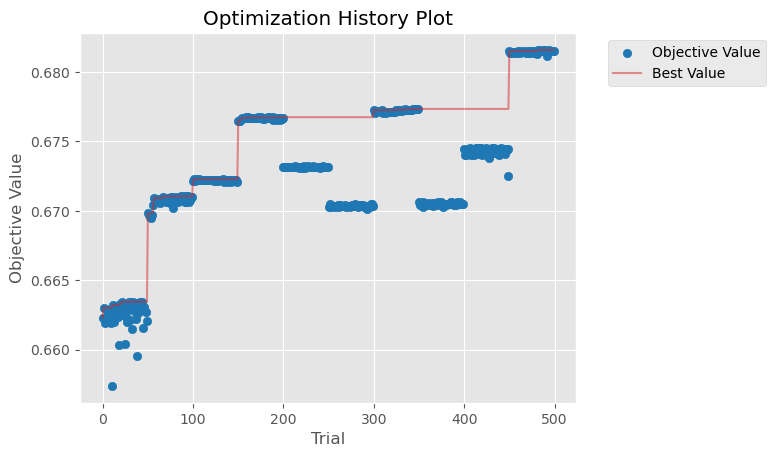

In [37]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [38]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.695785,0.035062
1,TP,165.600000,5.660781
2,TN,88.400000,5.834762
3,FP,25.000000,5.011099
4,FN,18.100000,5.021067
5,Accuracy,0.854931,0.022248
6,Precision,0.869284,0.023163
7,Sensitivity,0.901530,0.027126
8,Specificity,0.779470,0.043906
9,F1 score,0.884805,0.018120


In [39]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.698078,0.713316,0.703192,0.663824,0.699816,0.702531,0.706200,0.685020,0.680507,0.714576,0.696706,0.015822
1,TP,329.000000,336.000000,308.000000,319.000000,340.000000,323.000000,332.000000,317.000000,330.000000,338.000000,327.200000,10.271860
2,TN,189.000000,180.000000,191.000000,186.000000,170.000000,188.000000,165.000000,186.000000,176.000000,179.000000,181.000000,8.628119
3,FP,38.000000,43.000000,62.000000,56.000000,54.000000,44.000000,63.000000,49.000000,45.000000,48.000000,50.200000,8.323995
4,FN,39.000000,36.000000,34.000000,34.000000,31.000000,40.000000,35.000000,43.000000,44.000000,30.000000,36.600000,4.765618
5,Accuracy,0.870588,0.867227,0.838655,0.848739,0.857143,0.858824,0.835294,0.845378,0.850420,0.868908,0.854118,0.012497
6,Precision,0.896458,0.886544,0.832432,0.850667,0.862944,0.880109,0.840506,0.866120,0.880000,0.875648,0.867143,0.020672
7,Sensitivity,0.894022,0.903226,0.900585,0.903683,0.916442,0.889807,0.904632,0.880556,0.882353,0.918478,0.899378,0.012836
8,Specificity,0.832600,0.807200,0.754900,0.768600,0.758900,0.810300,0.723700,0.791500,0.796400,0.788500,0.783260,0.031914
9,F1 score,0.895238,0.894807,0.865169,0.876374,0.888889,0.884932,0.871391,0.873278,0.881175,0.896552,0.882780,0.011082


In [40]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)


r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_optimized_rf_cat = np.where((y_pred_optimized_rf >= 6.6), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_rf_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_rf))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_rf_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_rf_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_rf_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_rf_cat))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


rf_run0 = data_rf[['y_test_idx0', 'y_test0', 'y_pred_rf0']]
rf_run0.sort_values(by='y_test_idx0', inplace=True)
rf_run0.reset_index(inplace=True, drop=True)
rf_run1 = data_rf[['y_test_idx1', 'y_test1', 'y_pred_rf1']]
rf_run1.sort_values(by='y_test_idx1', inplace=True)
rf_run1.reset_index(inplace=True, drop=True)
rf_run2 = data_rf[['y_test_idx2', 'y_test2', 'y_pred_rf2']]
rf_run2.sort_values(by='y_test_idx2', inplace=True)
rf_run2.reset_index(inplace=True, drop=True)
rf_run3 = data_rf[['y_test_idx3', 'y_test3', 'y_pred_rf3']]
rf_run3.sort_values(by='y_test_idx3', inplace=True)
rf_run3.reset_index(inplace=True, drop=True)
rf_run4 = data_rf[['y_test_idx4', 'y_test4', 'y_pred_rf4']]
rf_run4.sort_values(by='y_test_idx4', inplace=True)
rf_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
rf_5preds = pd.concat([chembl_id, rf_run0, rf_run1, rf_run2, rf_run3, rf_run4], axis=1)
rf_5preds = rf_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_rf0', 'y_pred_rf1', 'y_pred_rf2', 'y_pred_rf3', 'y_pred_rf4']]
rf_5preds['y_pred_rf_ave'] = rf_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
rf_5preds['y_pred_rf_std'] = rf_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
rf_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_rf0,y_pred_rf1,y_pred_rf2,y_pred_rf3,y_pred_rf4,y_pred_rf_ave,y_pred_rf_std
0,CHEMBL2047687,0,5.48,6.487443,6.172934,6.294066,6.766141,6.212660,6.235541,0.392365
1,CHEMBL1164212,1,5.76,5.956641,5.793450,5.606055,5.828203,5.530371,5.745787,0.141218
2,CHEMBL2337873,2,6.07,6.281426,6.237559,6.228262,6.257529,6.300801,6.229263,0.075357
3,CHEMBL4577419,3,7.90,7.753711,7.721074,7.760254,7.743535,7.759980,7.773092,0.058306
4,CHEMBL515452,4,6.22,6.341273,6.478275,6.470288,6.489688,6.474082,6.412268,0.099620
...,...,...,...,...,...,...,...,...,...,...
2966,CHEMBL3693800,2966,8.22,8.190238,8.214844,8.157988,8.180781,8.174941,8.189799,0.021808
2967,CHEMBL2431917,2967,7.46,6.931250,6.940498,6.894951,6.794541,6.865117,6.981059,0.219529
2968,CHEMBL2413298,2968,6.26,6.037363,6.013965,5.999160,6.024043,6.069922,6.067409,0.088877
2969,CHEMBL3656016,2969,8.52,8.277852,8.361680,8.319395,8.293730,8.361367,8.355671,0.079876


In [41]:
mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,R2,0.699421,0.032262
1,Accuracy,0.854861,0.019029
2,Precision,0.871522,0.021260
3,Sensitivity,0.898262,0.019072
4,Specificity,0.783962,0.043908
5,F1 score,0.884464,0.014417
6,F1 score (weighted),0.853989,0.019517
7,F1 score (macro),0.844145,0.021952
8,Balanced Accuracy,0.841115,0.023206
9,MCC,0.689852,0.043010


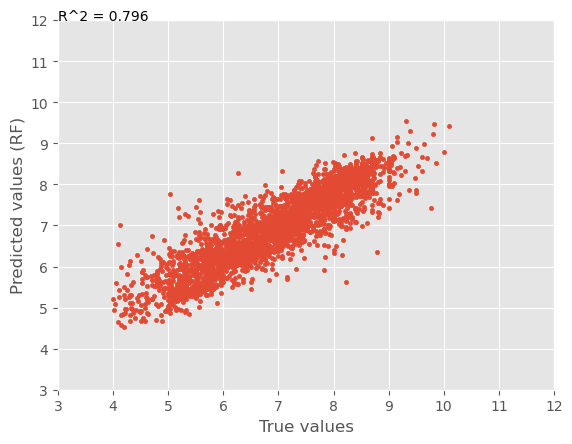

In [42]:
# Scatter plot

limits = 3,12
plt.figsize=(10,10)

plt.scatter(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (RF)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'])), (3, 12))
plt.show()

In [43]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_reg, X, Y, cv=10, scoring="r2")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="r2")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="r2")
print("RF baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model r2_score 0.6883 with a standard deviation of 0.0455
RF optimized model r2_score 0.6905 with a standard deviation of 0.0471


In [44]:
import joblib
joblib.dump(rf_reg, "OUTPUT/rf_reg.joblib")
#joblib.dump(optimized_rf, "OUTPUT/optimized_rf.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, "OUTPUT/optimizedCV_rf.joblib")

['OUTPUT/optimizedCV_rf.joblib']

## LGBMRegressor

In [45]:
%%time


r2_scores = np.empty(10)
TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_reg = lgbm.LGBMRegressor(
        objective="regression",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=8,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_reg.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="rmse",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_reg.predict(X_test) 
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.6
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met_lgbm = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    R2         0.685840     0.037290
1                    TP       162.000000     6.000000
2                    TN        89.200000     5.411921
3                    FP        24.200000     3.645393
4                    FN        21.700000     6.766749
5              Accuracy         0.845521     0.026458
6             Precision         0.870197     0.017561
7           Sensitivity         0.882145     0.035800
8           Specificity         0.786310     0.033805
9              F1 score         0.875819     0.022021
10  F1 score (weighted)         0.845193     0.025908
11     F1 score (macro)         0.835528     0.027842
12    Balanced Accuracy         0.834225     0.026186
13                  MCC         0.672291     0.055871
14                  NPV         0.806080     0.052256
15              ROC_AUC         0.834225     0.026186
CPU times: user 15.9 s, sys: 96.1 ms, total: 15.9 s
Wall time: 2.09 s


In [46]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [47]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        
    }
    
    
    
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
         # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.6
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred>= 6.6), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [48]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="lgbmRegressor")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:37:35,158] A new study created in memory with name: lgbmRegressor
[I 2023-12-11 21:37:36,697] Trial 0 finished with value: 0.6579495630360206 and parameters: {'n_estimators': 461, 'learning_rate': 0.15798534695614164, 'max_depth': 4, 'max_bin': 153, 'num_leaves': 406}. Best is trial 0 with value: 0.6579495630360206.
[I 2023-12-11 21:37:39,827] Trial 1 finished with value: 0.6636679704926822 and parameters: {'n_estimators': 759, 'learning_rate': 0.04367121853753636, 'max_depth': 6, 'max_bin': 170, 'num_leaves': 144}. Best is trial 1 with value: 0.6636679704926822.
[I 2023-12-11 21:37:40,724] Trial 2 finished with value: 0.6279012675226717 and parameters: {'n_estimators': 61, 'learning_rate': 0.1263439736153897, 'max_depth': 6, 'max_bin': 170, 'num_leaves': 229}. Best is trial 1 with value: 0.6636679704926822.
[I 2023-12-11 21:37:43,112] Trial 3 finished with value: 0.6622562783137355 and parameters: {'n_estimators': 877, 'learning_rate': 0.16865451269295004, 'max_depth'

	Number of trials: 50.0
	Best value (r2_score): 0.6894
	Best params:
		n_estimators: 358
		learning_rate: 0.0997149229551944
		max_depth: 12
		max_bin: 209
		num_leaves: 425


In [49]:
optimized_lgbm_0 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_lgbm_0)
# now convert the resuls to binary with cutoff 6.6

y_pred_lgbm_0_cat = np.where((y_pred_lgbm_0>= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_lgbm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_lgbm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_lgbm_0_cat)


mat_met_lgbm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    R2    0.707475
1                    TP  326.000000
2                    TN  186.000000
3                    FP   41.000000
4                    FN   42.000000
5              Accuracy    0.860504
6             Precision    0.888283
7           Sensitivity    0.885870
8           Specificity    0.819400
9              F1 score    0.887075
10  F1 score (weighted)    0.860563
11     F1 score (macro)    0.852329
12    Balanced Accuracy    0.852626
13                  MCC    0.704663
14                  NPV    0.815800
15              ROC_AUC    0.852626


In [50]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:40:34,994] Trial 50 finished with value: 0.6818691757249026 and parameters: {'n_estimators': 361, 'learning_rate': 0.05773453601017673, 'max_depth': 11, 'max_bin': 188, 'num_leaves': 110}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:40:39,474] Trial 51 finished with value: 0.6835466080899035 and parameters: {'n_estimators': 384, 'learning_rate': 0.08741934167516924, 'max_depth': 12, 'max_bin': 253, 'num_leaves': 434}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:40:43,827] Trial 52 finished with value: 0.6872850881540918 and parameters: {'n_estimators': 347, 'learning_rate': 0.09312248457390916, 'max_depth': 12, 'max_bin': 236, 'num_leaves': 397}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:40:47,683] Trial 53 finished with value: 0.679958015348143 and parameters: {'n_estimators': 324, 'learning_rate': 0.09759371127012928, 'max_depth': 12, 'max_bin': 232, 'num_leaves': 397}. Best is trial 32 with value: 0

	Number of trials: 100.0
	Best value (r2_score): 0.6894
	Best params:
		n_estimators: 358
		learning_rate: 0.0997149229551944
		max_depth: 12
		max_bin: 209
		num_leaves: 425


In [51]:
optimized_lgbm_1 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_lgbm_1)
# now convert the resuls to binary with cutoff 6.6
 
y_pred_lgbm_1_cat = np.where((y_pred_lgbm_1 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_lgbm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_lgbm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_lgbm_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    R2    0.707475    0.712588
1                    TP  326.000000  329.000000
2                    TN  186.000000  182.000000
3                    FP   41.000000   41.000000
4                    FN   42.000000   43.000000
5              Accuracy    0.860504    0.858824
6             Precision    0.888283    0.889189
7           Sensitivity    0.885870    0.884409
8           Specificity    0.819400    0.816100
9              F1 score    0.887075    0.886792
10  F1 score (weighted)    0.860563    0.858948
11     F1 score (macro)    0.852329    0.849646
12    Balanced Accuracy    0.852626    0.850276
13                  MCC    0.704663    0.699314
14                  NPV    0.815800    0.808900
15              ROC_AUC    0.852626    0.850276


In [52]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:43:50,365] Trial 100 finished with value: 0.6729954820005902 and parameters: {'n_estimators': 355, 'learning_rate': 0.05427859456759859, 'max_depth': 11, 'max_bin': 178, 'num_leaves': 500}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:43:54,508] Trial 101 finished with value: 0.6815314939491786 and parameters: {'n_estimators': 425, 'learning_rate': 0.0823828190516165, 'max_depth': 12, 'max_bin': 189, 'num_leaves': 440}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:43:59,005] Trial 102 finished with value: 0.6798250713448306 and parameters: {'n_estimators': 389, 'learning_rate': 0.07962873679670207, 'max_depth': 12, 'max_bin': 183, 'num_leaves': 534}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:44:02,600] Trial 103 finished with value: 0.6802714010114901 and parameters: {'n_estimators': 444, 'learning_rate': 0.09877732382388624, 'max_depth': 12, 'max_bin': 151, 'num_leaves': 387}. Best is trial 32 with valu

	Number of trials: 150.0
	Best value (r2_score): 0.6894
	Best params:
		n_estimators: 358
		learning_rate: 0.0997149229551944
		max_depth: 12
		max_bin: 209
		num_leaves: 425


In [53]:
optimized_lgbm_2 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_lgbm_2)
# now convert the resuls to binary with cutoff 6.6

y_pred_lgbm_2_cat = np.where((y_pred_lgbm_2 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_lgbm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_lgbm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_lgbm_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.707475    0.712588    0.708269
1                    TP  326.000000  329.000000  309.000000
2                    TN  186.000000  182.000000  190.000000
3                    FP   41.000000   41.000000   63.000000
4                    FN   42.000000   43.000000   33.000000
5              Accuracy    0.860504    0.858824    0.838655
6             Precision    0.888283    0.889189    0.830645
7           Sensitivity    0.885870    0.884409    0.903509
8           Specificity    0.819400    0.816100    0.751000
9              F1 score    0.887075    0.886792    0.865546
10  F1 score (weighted)    0.860563    0.858948    0.836961
11     F1 score (macro)    0.852329    0.849646    0.831933
12    Balanced Accuracy    0.852626    0.850276    0.827248
13                  MCC    0.704663    0.699314    0.668432
14                  NPV    0.815800    0.808900    0.852000
15              ROC_AUC    0.852626    0

In [54]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:47:08,097] Trial 150 finished with value: 0.6851289732484257 and parameters: {'n_estimators': 210, 'learning_rate': 0.08021496471857605, 'max_depth': 11, 'max_bin': 211, 'num_leaves': 373}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:47:11,755] Trial 151 finished with value: 0.6884515051809654 and parameters: {'n_estimators': 235, 'learning_rate': 0.08168102198758859, 'max_depth': 11, 'max_bin': 212, 'num_leaves': 372}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:47:14,336] Trial 152 finished with value: 0.6754872460032126 and parameters: {'n_estimators': 158, 'learning_rate': 0.07914791633125928, 'max_depth': 10, 'max_bin': 210, 'num_leaves': 379}. Best is trial 32 with value: 0.6893895777854706.
[I 2023-12-11 21:47:17,437] Trial 153 finished with value: 0.6845963833389044 and parameters: {'n_estimators': 230, 'learning_rate': 0.09116578612020888, 'max_depth': 10, 'max_bin': 212, 'num_leaves': 351}. Best is trial 32 with val

	Number of trials: 200.0
	Best value (r2_score): 0.6934
	Best params:
		n_estimators: 279
		learning_rate: 0.11146307406304887
		max_depth: 10
		max_bin: 211
		num_leaves: 344


In [55]:
optimized_lgbm_3 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_lgbm_3)
# now convert the resuls to binary with cutoff 6.6

y_pred_lgbm_3_cat = np.where((y_pred_lgbm_3 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_lgbm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_lgbm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_lgbm_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.707475    0.712588    0.708269    0.684985
1                    TP  326.000000  329.000000  309.000000  309.000000
2                    TN  186.000000  182.000000  190.000000  183.000000
3                    FP   41.000000   41.000000   63.000000   59.000000
4                    FN   42.000000   43.000000   33.000000   44.000000
5              Accuracy    0.860504    0.858824    0.838655    0.826891
6             Precision    0.888283    0.889189    0.830645    0.839674
7           Sensitivity    0.885870    0.884409    0.903509    0.875354
8           Specificity    0.819400    0.816100    0.751000    0.756200
9              F1 score    0.887075    0.886792    0.865546    0.857143
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763
12    Balanced Accuracy    0.852626    0.850276    0.827248    0

In [56]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:49:41,250] Trial 200 finished with value: 0.672398983467474 and parameters: {'n_estimators': 282, 'learning_rate': 0.10896229371991623, 'max_depth': 9, 'max_bin': 210, 'num_leaves': 281}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:49:44,130] Trial 201 finished with value: 0.6753326284035068 and parameters: {'n_estimators': 297, 'learning_rate': 0.11296523228086457, 'max_depth': 10, 'max_bin': 216, 'num_leaves': 308}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:49:47,219] Trial 202 finished with value: 0.678626145206785 and parameters: {'n_estimators': 268, 'learning_rate': 0.11099341001063845, 'max_depth': 10, 'max_bin': 220, 'num_leaves': 341}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:49:50,221] Trial 203 finished with value: 0.6799052927125464 and parameters: {'n_estimators': 297, 'learning_rate': 0.11495736197661101, 'max_depth': 10, 'max_bin': 212, 'num_leaves': 323}. Best is trial 197 with va

	Number of trials: 250.0
	Best value (r2_score): 0.6934
	Best params:
		n_estimators: 279
		learning_rate: 0.11146307406304887
		max_depth: 10
		max_bin: 211
		num_leaves: 344


In [57]:
optimized_lgbm_4 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_lgbm_4)
# now convert the resuls to binary with cutoff 6.6
 
y_pred_lgbm_4_cat = np.where((y_pred_lgbm_4 >= 6.6) , 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_lgbm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_lgbm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_lgbm_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

In [58]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:52:17,286] Trial 250 finished with value: 0.691993940717144 and parameters: {'n_estimators': 327, 'learning_rate': 0.11275025411186665, 'max_depth': 10, 'max_bin': 223, 'num_leaves': 391}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:52:21,063] Trial 251 finished with value: 0.6862339650646565 and parameters: {'n_estimators': 334, 'learning_rate': 0.10006404240793174, 'max_depth': 10, 'max_bin': 224, 'num_leaves': 379}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:52:24,509] Trial 252 finished with value: 0.6874849549733001 and parameters: {'n_estimators': 322, 'learning_rate': 0.12797049655533094, 'max_depth': 10, 'max_bin': 227, 'num_leaves': 365}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:52:27,648] Trial 253 finished with value: 0.6887627196147245 and parameters: {'n_estimators': 613, 'learning_rate': 0.13248961009600513, 'max_depth': 10, 'max_bin': 224, 'num_leaves': 370}. Best is trial 197 with 

	Number of trials: 300.0
	Best value (r2_score): 0.6934
	Best params:
		n_estimators: 279
		learning_rate: 0.11146307406304887
		max_depth: 10
		max_bin: 211
		num_leaves: 344


In [59]:
optimized_lgbm_5 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_lgbm_5)
# now convert the resuls to binary with cutoff 6.6
y_pred_lgbm_5_cat = np.where((y_pred_lgbm_5 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_lgbm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_lgbm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_lgbm_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

In [60]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:55:06,874] Trial 300 finished with value: 0.692499185949022 and parameters: {'n_estimators': 687, 'learning_rate': 0.10748252240425245, 'max_depth': 10, 'max_bin': 202, 'num_leaves': 410}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:55:08,245] Trial 301 finished with value: 0.6607806798467613 and parameters: {'n_estimators': 63, 'learning_rate': 0.10630530847915554, 'max_depth': 10, 'max_bin': 194, 'num_leaves': 429}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:55:11,900] Trial 302 finished with value: 0.6913080586373965 and parameters: {'n_estimators': 689, 'learning_rate': 0.10886331079904914, 'max_depth': 10, 'max_bin': 200, 'num_leaves': 409}. Best is trial 197 with value: 0.6933563112923475.
[I 2023-12-11 21:55:16,093] Trial 303 finished with value: 0.6926475923239603 and parameters: {'n_estimators': 734, 'learning_rate': 0.10232236016117385, 'max_depth': 10, 'max_bin': 200, 'num_leaves': 428}. Best is trial 197 with v

	Number of trials: 350.0
	Best value (r2_score): 0.693461
	Best params:
		n_estimators: 744
		learning_rate: 0.09163568258296839
		max_depth: 10
		max_bin: 190
		num_leaves: 436


In [61]:
optimized_lgbm_6 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_lgbm_6)
# now convert the resuls to binary with cutoff 6.6
y_pred_lgbm_6_cat = np.where((y_pred_lgbm_6 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_lgbm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_lgbm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_lgbm_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

In [62]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 21:58:18,443] Trial 350 finished with value: 0.6844960735677386 and parameters: {'n_estimators': 697, 'learning_rate': 0.10429092763374932, 'max_depth': 10, 'max_bin': 183, 'num_leaves': 418}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 21:58:22,262] Trial 351 finished with value: 0.6864448013257091 and parameters: {'n_estimators': 738, 'learning_rate': 0.10533849838002188, 'max_depth': 10, 'max_bin': 193, 'num_leaves': 456}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 21:58:27,064] Trial 352 finished with value: 0.6839309077231602 and parameters: {'n_estimators': 688, 'learning_rate': 0.09005633784695138, 'max_depth': 10, 'max_bin': 202, 'num_leaves': 400}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 21:58:31,496] Trial 353 finished with value: 0.6800769055823412 and parameters: {'n_estimators': 736, 'learning_rate': 0.0953089912888374, 'max_depth': 10, 'max_bin': 193, 'num_leaves': 425}. Best is trial 319 with 

	Number of trials: 400.0
	Best value (r2_score): 0.6934613
	Best params:
		n_estimators: 744
		learning_rate: 0.09163568258296839
		max_depth: 10
		max_bin: 190
		num_leaves: 436


In [63]:
optimized_lgbm_7 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_lgbm_7)
# now convert the resuls to binary with cutoff 6.6
y_pred_lgbm_7_cat = np.where((y_pred_lgbm_7 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_lgbm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_lgbm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_lgbm_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

In [64]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:01:38,383] Trial 400 finished with value: 0.677893211847519 and parameters: {'n_estimators': 757, 'learning_rate': 0.1484615405119425, 'max_depth': 10, 'max_bin': 209, 'num_leaves': 402}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:01:41,652] Trial 401 finished with value: 0.6696519809886892 and parameters: {'n_estimators': 775, 'learning_rate': 0.10670157306192099, 'max_depth': 8, 'max_bin': 201, 'num_leaves': 439}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:01:44,735] Trial 402 finished with value: 0.6712843268690133 and parameters: {'n_estimators': 695, 'learning_rate': 0.12033162611931754, 'max_depth': 10, 'max_bin': 190, 'num_leaves': 421}. Best is trial 319 with value: 0.6934612754698257.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[I 2023-12-11 22:01:47,825] Trial 403 finished with value: 0.66999372361087 and parameters: {'n_estimators': 738, 'learning_rate': 0.1027038994006237, 'max_depth': 10, 'max_bin': 195, 'num_leaves': 31}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:01:49,633] Trial 404 finished with value: 0.6632895025553133 and parameters: {'n_estimators': 105, 'learning_rate': 0.09737221829814169, 'max_depth': 9, 'max_bin': 198, 'num_leaves': 395}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:01:52,575] Trial 405 finished with value: 0.6745626058795097 and parameters: {'n_estimators': 801, 'learning_rate': 0.13812614173128424, 'max_depth': 11, 'max_bin': 181, 'num_leaves': 486}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:01:55,862] Trial 406 finished with value: 0.6718099068131711 and parameters: {'n_estimators': 718, 'learning_rate': 0.11055369242684682, 'max_depth': 10, 'max_bin': 263, 'num_leaves': 457}. Best is trial 319 with valu

	Number of trials: 450.0
	Best value (r2_score): 0.69346128
	Best params:
		n_estimators: 744
		learning_rate: 0.09163568258296839
		max_depth: 10
		max_bin: 190
		num_leaves: 436


In [65]:
optimized_lgbm_8 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_lgbm_8)
# now convert the resuls to binary with cutoff 6.6
y_pred_lgbm_8_cat = np.where((y_pred_lgbm_8 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_lgbm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_lgbm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_lgbm_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

In [66]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:04:14,379] Trial 450 finished with value: 0.6794440951240515 and parameters: {'n_estimators': 223, 'learning_rate': 0.1107611852943453, 'max_depth': 10, 'max_bin': 166, 'num_leaves': 448}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:04:20,044] Trial 451 finished with value: 0.6796442172928703 and parameters: {'n_estimators': 514, 'learning_rate': 0.03133234667752596, 'max_depth': 9, 'max_bin': 210, 'num_leaves': 391}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:04:23,222] Trial 452 finished with value: 0.6796782084849815 and parameters: {'n_estimators': 585, 'learning_rate': 0.1509623197946436, 'max_depth': 10, 'max_bin': 296, 'num_leaves': 410}. Best is trial 319 with value: 0.6934612754698257.
[I 2023-12-11 22:04:26,412] Trial 453 finished with value: 0.6836261381477191 and parameters: {'n_estimators': 661, 'learning_rate': 0.10729071601116238, 'max_depth': 10, 'max_bin': 202, 'num_leaves': 433}. Best is trial 319 with va

	Number of trials: 500.0
	Best value (r2_score): 0.693461275
	Best params:
		n_estimators: 744
		learning_rate: 0.09163568258296839
		max_depth: 10
		max_bin: 190
		num_leaves: 436


In [67]:
optimized_lgbm_9 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_lgbm_9)
# now convert the resuls to binary with cutoff 6.6
y_pred_lgbm_9_cat = np.where((y_pred_lgbm_9 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_lgbm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_lgbm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_lgbm_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.707475    0.712588    0.708269    0.684985   
1                    TP  326.000000  329.000000  309.000000  309.000000   
2                    TN  186.000000  182.000000  190.000000  183.000000   
3                    FP   41.000000   41.000000   63.000000   59.000000   
4                    FN   42.000000   43.000000   33.000000   44.000000   
5              Accuracy    0.860504    0.858824    0.838655    0.826891   
6             Precision    0.888283    0.889189    0.830645    0.839674   
7           Sensitivity    0.885870    0.884409    0.903509    0.875354   
8           Specificity    0.819400    0.816100    0.751000    0.756200   
9              F1 score    0.887075    0.886792    0.865546    0.857143   
10  F1 score (weighted)    0.860563    0.858948    0.836961    0.825923   
11     F1 score (macro)    0.852329    0.849646    0.831933    0.818763   
12    Balanced Accuracy  

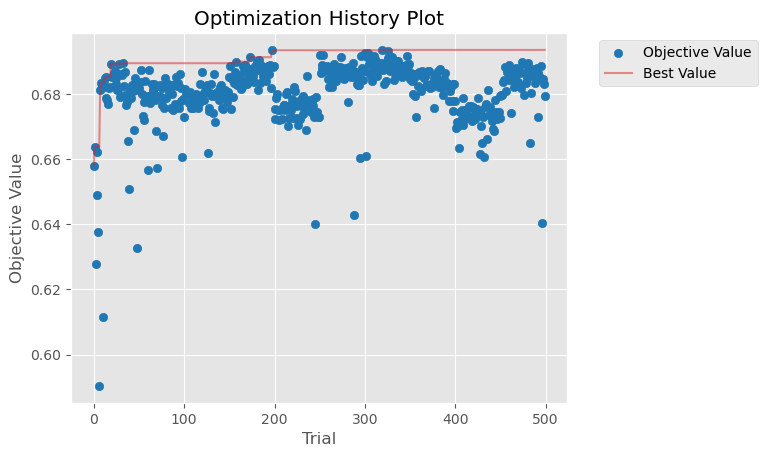

In [68]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

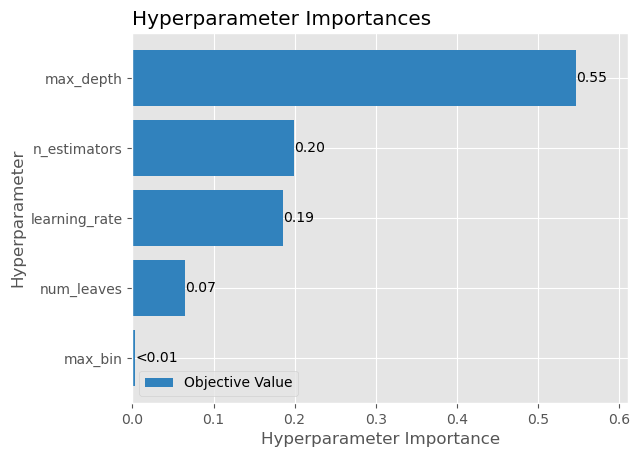

In [69]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [70]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    R2         0.702777     0.027579
1                    TP       163.300000     4.967673
2                    TN        89.300000     5.538752
3                    FP        24.100000     4.581363
4                    FN        20.400000     5.378971
5              Accuracy         0.850220     0.020697
6             Precision         0.871846     0.020730
7           Sensitivity         0.889152     0.028304
8           Specificity         0.787400     0.040307
9              F1 score         0.880075     0.016670
10  F1 score (weighted)         0.849663     0.020623
11     F1 score (macro)         0.840115     0.022301
12    Balanced Accuracy         0.838284     0.022368
13                  MCC         0.681773     0.044447
14                  NPV         0.815350     0.041577
15              ROC_AUC         0.838284     0.022368


In [71]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.707475,0.712588,0.708269,0.684985,0.690156,0.693837,0.686856,0.669776,0.693923,0.723982,0.697185,0.015854
1,TP,326.000000,329.000000,309.000000,309.000000,328.000000,320.000000,331.000000,315.000000,329.000000,333.000000,322.900000,9.036346
2,TN,186.000000,182.000000,190.000000,183.000000,164.000000,188.000000,170.000000,177.000000,179.000000,180.000000,179.900000,8.020114
3,FP,41.000000,41.000000,63.000000,59.000000,60.000000,44.000000,58.000000,58.000000,42.000000,47.000000,51.300000,9.019116
4,FN,42.000000,43.000000,33.000000,44.000000,43.000000,43.000000,36.000000,45.000000,45.000000,35.000000,40.900000,4.458450
5,Accuracy,0.860504,0.858824,0.838655,0.826891,0.826891,0.853782,0.842017,0.826891,0.853782,0.862185,0.845042,0.014583
6,Precision,0.888283,0.889189,0.830645,0.839674,0.845361,0.879121,0.850900,0.844504,0.886792,0.876316,0.863079,0.022898
7,Sensitivity,0.885870,0.884409,0.903509,0.875354,0.884097,0.881543,0.901907,0.875000,0.879679,0.904891,0.887626,0.011501
8,Specificity,0.819400,0.816100,0.751000,0.756200,0.732100,0.810300,0.745600,0.753200,0.810000,0.793000,0.778690,0.034041
9,F1 score,0.887075,0.886792,0.865546,0.857143,0.864295,0.880330,0.875661,0.859482,0.883221,0.890374,0.874992,0.012389


In [72]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_optimized_lgbm_cat = np.where((y_pred_optimized_lgbm >= 6.6), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_lgbm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_lgbm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_lgbm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_lgbm_cat))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


lgbm_run0 = data_lgbm[['y_test_idx0', 'y_test0', 'y_pred_lgbm0']]
lgbm_run0.sort_values(by='y_test_idx0', inplace=True)
lgbm_run0.reset_index(inplace=True, drop=True)
lgbm_run1 = data_lgbm[['y_test_idx1', 'y_test1', 'y_pred_lgbm1']]
lgbm_run1.sort_values(by='y_test_idx1', inplace=True)
lgbm_run1.reset_index(inplace=True, drop=True)
lgbm_run2 = data_lgbm[['y_test_idx2', 'y_test2', 'y_pred_lgbm2']]
lgbm_run2.sort_values(by='y_test_idx2', inplace=True)
lgbm_run2.reset_index(inplace=True, drop=True)
lgbm_run3 = data_lgbm[['y_test_idx3', 'y_test3', 'y_pred_lgbm3']]
lgbm_run3.sort_values(by='y_test_idx3', inplace=True)
lgbm_run3.reset_index(inplace=True, drop=True)
lgbm_run4 = data_lgbm[['y_test_idx4', 'y_test4', 'y_pred_lgbm4']]
lgbm_run4.sort_values(by='y_test_idx4', inplace=True)
lgbm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
lgbm_5preds = pd.concat([chembl_id, lgbm_run0, lgbm_run1, lgbm_run2, lgbm_run3, lgbm_run4], axis=1)
lgbm_5preds = lgbm_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_lgbm0', 'y_pred_lgbm1', 'y_pred_lgbm2', 'y_pred_lgbm3', 'y_pred_lgbm4']]
lgbm_5preds['y_pred_lgbm_ave'] = lgbm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
lgbm_5preds['y_pred_lgbm_std'] = lgbm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
lgbm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_lgbm0,y_pred_lgbm1,y_pred_lgbm2,y_pred_lgbm3,y_pred_lgbm4,y_pred_lgbm_ave,y_pred_lgbm_std
0,CHEMBL2047687,0,5.48,6.528383,6.458908,6.483957,6.955678,6.556552,6.410580,0.448333
1,CHEMBL1164212,1,5.76,5.040031,5.084255,4.899712,4.885101,5.258132,5.154539,0.298021
2,CHEMBL2337873,2,6.07,6.218656,6.028848,6.090655,6.119664,6.239675,6.127916,0.076756
3,CHEMBL4577419,3,7.90,7.520235,7.656090,7.608416,7.657833,7.683077,7.670942,0.115202
4,CHEMBL515452,4,6.22,6.634060,6.757312,6.499352,6.670867,6.764183,6.590962,0.187938
...,...,...,...,...,...,...,...,...,...,...
2966,CHEMBL3693800,2966,8.22,8.290476,8.055604,8.171219,8.089339,7.975300,8.133656,0.105350
2967,CHEMBL2431917,2967,7.46,6.768940,6.884417,6.945022,6.847230,6.713712,6.936554,0.245804
2968,CHEMBL2413298,2968,6.26,6.201689,6.112414,6.022732,6.065887,6.101353,6.127346,0.080357
2969,CHEMBL3656016,2969,8.52,8.087657,8.186060,8.151152,8.122321,8.204391,8.211930,0.143062


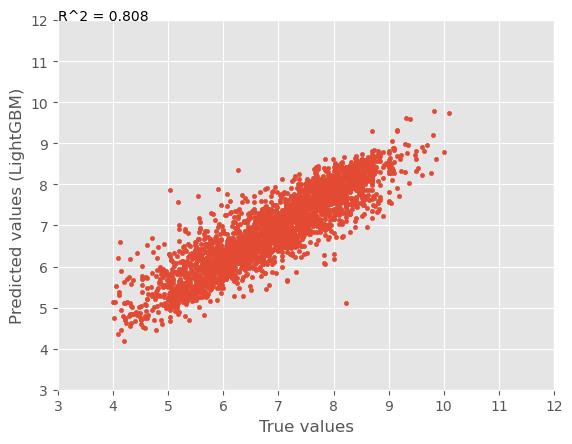

In [73]:
# Scatter plot

limits = 3,12
plt.figsize=(10,10)

plt.scatter(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'])), (3, 12))
plt.show()

In [74]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_reg, X, Y, cv=10, scoring="r2")
#r2_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="r2")
r2_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="r2", fit_params=fit_params)
print("LightGBM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)r2_score %0.4f with a standard deviation of %0.4f" % (r2_cv_lgbm_opt_testSet.mean(), r2_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(r2_cv_lgbm_opt), np.std(r2_cv_lgbm_opt, ddof=1)))

LightGBM baseline model r2_score 0.6906 with a standard deviation of 0.0521
LightGBM optimized model r2_score 0.6968 with a standard deviation of 0.0524


In [75]:
joblib.dump(lgbm_reg, "OUTPUT/lgbm_reg.joblib")
#joblib.dump(optimized_lgbm, "OUTPUT/optimized_lgbm.joblib")
joblib.dump(optimizedCV_lgbm, "OUTPUT/optimizedCV_lgbm.joblib") 
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_lgbm.joblib']

## XGBoost

In [76]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_reg.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.6
    y_test_cat = np.where((y_test>=6.6), 1, 0) 
    y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores),np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.662598     0.038923
1                    TP       161.600000     4.427189
2                    TN        86.800000     5.996295
3                    FP        26.600000     5.295701
4                    FN        22.100000     5.363457
5              Accuracy         0.836089     0.025141
6             Precision         0.859163     0.024939
7           Sensitivity         0.879961     0.027890
8           Specificity         0.765400     0.046490
9              F1 score         0.869120     0.019589
10  F1 score (weighted)         0.835359     0.025155
11     F1 score (macro)         0.824767     0.027497
12    Balanced Accuracy         0.822684     0.028069
13                  MCC         0.651094     0.055165
14                  NPV         0.797850     0.044256
15              ROC_AUC         0.822684     0.028069
CPU times: user 1h 48min 34s, sys: 6.51 s, total: 1h 48min 41s
Wall time: 5min 7s


In [77]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
            
    return np.mean(cv_scores)

In [78]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred>=6.6), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [79]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBRegressor")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:13:34,076] A new study created in memory with name: XGBRegressor
[I 2023-12-11 22:13:41,290] Trial 0 finished with value: 0.6449008119095928 and parameters: {'n_estimators': 197, 'eta': 0.03174881352395979, 'max_depth': 10, 'alpha': 0.2625, 'lambda': 21.291875048940536, 'max_bin': 493}. Best is trial 0 with value: 0.6449008119095928.
[I 2023-12-11 22:13:50,773] Trial 1 finished with value: 0.6696103902623959 and parameters: {'n_estimators': 291, 'eta': 0.05032193045334962, 'max_depth': 8, 'alpha': 0.5870000000000001, 'lambda': 36.58635931682256, 'max_bin': 387}. Best is trial 1 with value: 0.6696103902623959.
[I 2023-12-11 22:14:18,615] Trial 2 finished with value: 0.6570326413347682 and parameters: {'n_estimators': 615, 'eta': 0.01103680977149842, 'max_depth': 12, 'alpha': 0.5929, 'lambda': 23.60465359775388, 'max_bin': 279}. Best is trial 1 with value: 0.6696103902623959.
[I 2023-12-11 22:14:22,057] Trial 3 finished with value: -9.900503702392943 and parameters: {'n_

	Number of trials: 50.0
	Best value (r2_score): 0.6909
	Best params:
		n_estimators: 606
		eta: 0.08140645804057761
		max_depth: 7
		alpha: 0.6611
		lambda: 26.15370889233347
		max_bin: 451


In [80]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

    # r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_xgb_0)
y_pred_xgb_0_cat = np.where((y_pred_xgb_0 >= 6.6), 1, 0)
    #calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_xgb_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_xgb_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_xgb_0_cat)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    R2    0.714082
1                    TP  328.000000
2                    TN  186.000000
3                    FP   41.000000
4                    FN   40.000000
5              Accuracy    0.863866
6             Precision    0.888889
7           Sensitivity    0.891304
8           Specificity    0.819400
9              F1 score    0.890095
10  F1 score (weighted)    0.863808
11     F1 score (macro)    0.855644
12    Balanced Accuracy    0.855344
13                  MCC    0.711292
14                  NPV    0.823000
15              ROC_AUC    0.855344


In [81]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:26:13,554] Trial 50 finished with value: 0.6873332375975195 and parameters: {'n_estimators': 761, 'eta': 0.09535055124800566, 'max_depth': 9, 'alpha': 0.5621, 'lambda': 31.67312208849351, 'max_bin': 479}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:26:26,861] Trial 51 finished with value: 0.681803634711763 and parameters: {'n_estimators': 710, 'eta': 0.09177929548668795, 'max_depth': 9, 'alpha': 0.6001000000000001, 'lambda': 28.464231328523564, 'max_bin': 454}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:26:42,053] Trial 52 finished with value: 0.6844253975345047 and parameters: {'n_estimators': 843, 'eta': 0.08015765741265451, 'max_depth': 7, 'alpha': 0.6489, 'lambda': 27.92718234937739, 'max_bin': 441}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:26:55,943] Trial 53 finished with value: 0.6816851400264312 and parameters: {'n_estimators': 761, 'eta': 0.08687689388058235, 'max_depth': 9, 'alpha': 0.7054,

	Number of trials: 100.0
	Best value (r2_score): 0.6909
	Best params:
		n_estimators: 606
		eta: 0.08140645804057761
		max_depth: 7
		alpha: 0.6611
		lambda: 26.15370889233347
		max_bin: 451


In [82]:
optimized_xgb_1 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_xgb_1)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_1_cat = np.where((y_pred_xgb_1 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_xgb_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_xgb_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_xgb_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    R2    0.714082    0.725363
1                    TP  328.000000  331.000000
2                    TN  186.000000  187.000000
3                    FP   41.000000   36.000000
4                    FN   40.000000   41.000000
5              Accuracy    0.863866    0.870588
6             Precision    0.888889    0.901907
7           Sensitivity    0.891304    0.889785
8           Specificity    0.819400    0.838600
9              F1 score    0.890095    0.895805
10  F1 score (weighted)    0.863808    0.870868
11     F1 score (macro)    0.855644    0.862537
12    Balanced Accuracy    0.855344    0.864175
13                  MCC    0.711292    0.725210
14                  NPV    0.823000    0.820200
15              ROC_AUC    0.855344    0.864175


In [83]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:38:39,012] Trial 100 finished with value: 0.6888707404668317 and parameters: {'n_estimators': 816, 'eta': 0.085950567436612, 'max_depth': 6, 'alpha': 0.8274, 'lambda': 30.503070949346167, 'max_bin': 440}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:38:53,551] Trial 101 finished with value: 0.6861526943421156 and parameters: {'n_estimators': 811, 'eta': 0.08511333452849563, 'max_depth': 6, 'alpha': 0.8715, 'lambda': 30.198512036335583, 'max_bin': 439}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:39:08,318] Trial 102 finished with value: 0.6898561316926541 and parameters: {'n_estimators': 863, 'eta': 0.08693425926449588, 'max_depth': 6, 'alpha': 0.8349000000000001, 'lambda': 30.70299287234463, 'max_bin': 430}. Best is trial 31 with value: 0.6909394963503777.
[I 2023-12-11 22:39:19,140] Trial 103 finished with value: 0.6826712944165663 and parameters: {'n_estimators': 860, 'eta': 0.09314899855687364, 'max_depth': 5, 'alpha': 0.8

	Number of trials: 150.0
	Best value (r2_score): 0.6916
	Best params:
		n_estimators: 806
		eta: 0.08200877815151014
		max_depth: 8
		alpha: 0.9987
		lambda: 38.87100685733104
		max_bin: 260


In [84]:
optimized_xgb_2 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_xgb_2)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_2_cat = np.where((y_pred_xgb_2 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_xgb_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_xgb_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_xgb_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.714082    0.725363    0.713134
1                    TP  328.000000  331.000000  311.000000
2                    TN  186.000000  187.000000  194.000000
3                    FP   41.000000   36.000000   59.000000
4                    FN   40.000000   41.000000   31.000000
5              Accuracy    0.863866    0.870588    0.848739
6             Precision    0.888889    0.901907    0.840541
7           Sensitivity    0.891304    0.889785    0.909357
8           Specificity    0.819400    0.838600    0.766800
9              F1 score    0.890095    0.895805    0.873596
10  F1 score (weighted)    0.863808    0.870868    0.847283
11     F1 score (macro)    0.855644    0.862537    0.842655
12    Balanced Accuracy    0.855344    0.864175    0.838078
13                  MCC    0.711292    0.725210    0.689331
14                  NPV    0.823000    0.820200    0.862200
15              ROC_AUC    0.855344    0

In [85]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 22:51:01,484] Trial 150 finished with value: 0.6958712768001999 and parameters: {'n_estimators': 748, 'eta': 0.07964945776267479, 'max_depth': 6, 'alpha': 0.8527, 'lambda': 34.03671376330611, 'max_bin': 338}. Best is trial 150 with value: 0.6958712768001999.
[I 2023-12-11 22:51:16,737] Trial 151 finished with value: 0.6975781740455131 and parameters: {'n_estimators': 754, 'eta': 0.08086337099765775, 'max_depth': 6, 'alpha': 0.8510000000000001, 'lambda': 33.84509206547516, 'max_bin': 359}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 22:51:31,133] Trial 152 finished with value: 0.6961307544839339 and parameters: {'n_estimators': 753, 'eta': 0.08018402487453233, 'max_depth': 6, 'alpha': 0.8428, 'lambda': 34.056647119007344, 'max_bin': 361}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 22:51:45,483] Trial 153 finished with value: 0.6957535820796696 and parameters: {'n_estimators': 743, 'eta': 0.07971172562879122, 'max_depth': 6, 'alpha':

	Number of trials: 200.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [86]:
optimized_xgb_3 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_xgb_3)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_3_cat = np.where((y_pred_xgb_3 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_xgb_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_xgb_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_xgb_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.714082    0.725363    0.713134    0.688499
1                    TP  328.000000  331.000000  311.000000  319.000000
2                    TN  186.000000  187.000000  194.000000  183.000000
3                    FP   41.000000   36.000000   59.000000   59.000000
4                    FN   40.000000   41.000000   31.000000   34.000000
5              Accuracy    0.863866    0.870588    0.848739    0.843697
6             Precision    0.888889    0.901907    0.840541    0.843915
7           Sensitivity    0.891304    0.889785    0.909357    0.903683
8           Specificity    0.819400    0.838600    0.766800    0.756200
9              F1 score    0.890095    0.895805    0.873596    0.872777
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081
12    Balanced Accuracy    0.855344    0.864175    0.838078    0

In [87]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:02:34,355] Trial 200 finished with value: 0.6884058336123223 and parameters: {'n_estimators': 671, 'eta': 0.07522010339310731, 'max_depth': 6, 'alpha': 0.8551000000000001, 'lambda': 34.25990486841354, 'max_bin': 384}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:02:48,081] Trial 201 finished with value: 0.6865147875679934 and parameters: {'n_estimators': 701, 'eta': 0.07965316903696806, 'max_depth': 6, 'alpha': 0.8276, 'lambda': 35.8294123005056, 'max_bin': 369}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:03:01,308] Trial 202 finished with value: 0.689227593080469 and parameters: {'n_estimators': 720, 'eta': 0.0825649467700035, 'max_depth': 6, 'alpha': 0.8227, 'lambda': 33.310304136305895, 'max_bin': 359}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:03:14,065] Trial 203 finished with value: 0.6895690495298504 and parameters: {'n_estimators': 649, 'eta': 0.07746046399301372, 'max_depth': 6, 'alpha': 0.

	Number of trials: 250.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [88]:
optimized_xgb_4 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_xgb_4)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_4_cat = np.where((y_pred_xgb_4 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_xgb_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_xgb_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_xgb_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

In [89]:
len(y_pred_xgb_4_cat)

595

In [90]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:13:54,572] Trial 250 finished with value: 0.6915293358968834 and parameters: {'n_estimators': 587, 'eta': 0.08288802806543835, 'max_depth': 6, 'alpha': 0.8228000000000001, 'lambda': 22.068346832297717, 'max_bin': 373}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:14:08,245] Trial 251 finished with value: 0.6884202830665173 and parameters: {'n_estimators': 613, 'eta': 0.0784724334238476, 'max_depth': 6, 'alpha': 0.8021, 'lambda': 33.05070172326349, 'max_bin': 354}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:14:23,545] Trial 252 finished with value: 0.6925521117196729 and parameters: {'n_estimators': 745, 'eta': 0.07297168282829995, 'max_depth': 6, 'alpha': 0.8947, 'lambda': 34.064312767755844, 'max_bin': 378}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:14:38,152] Trial 253 finished with value: 0.6905585611640143 and parameters: {'n_estimators': 688, 'eta': 0.06790222659890977, 'max_depth': 6, 'alpha':

	Number of trials: 300.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [91]:
optimized_xgb_5 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_xgb_5)
# now convert the resuls to binary with cutoff 6.5

y_pred_xgb_5_cat = np.where((y_pred_xgb_5 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_xgb_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_xgb_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_xgb_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

In [92]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:25:32,347] Trial 300 finished with value: 0.6892631015180364 and parameters: {'n_estimators': 743, 'eta': 0.07335277972374518, 'max_depth': 6, 'alpha': 0.8328, 'lambda': 21.81522958940362, 'max_bin': 375}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:25:46,476] Trial 301 finished with value: 0.6914794776374394 and parameters: {'n_estimators': 660, 'eta': 0.08131315942668985, 'max_depth': 6, 'alpha': 0.7559, 'lambda': 30.554457000365343, 'max_bin': 361}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:26:00,550] Trial 302 finished with value: 0.6915006158066985 and parameters: {'n_estimators': 636, 'eta': 0.07562027803406117, 'max_depth': 6, 'alpha': 0.7928000000000001, 'lambda': 31.77293819559495, 'max_bin': 342}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:26:16,109] Trial 303 finished with value: 0.6942961399849992 and parameters: {'n_estimators': 684, 'eta': 0.07073543199112155, 'max_depth': 6, 'alpha':

	Number of trials: 350.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [93]:
optimized_xgb_6 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_xgb_6)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_6_cat = np.where((y_pred_xgb_6 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_xgb_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_xgb_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_xgb_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

In [94]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:37:35,743] Trial 350 finished with value: 0.6739856103251564 and parameters: {'n_estimators': 692, 'eta': 0.09518232512061074, 'max_depth': 6, 'alpha': 0.8575, 'lambda': 1.1660572000565779, 'max_bin': 361}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:37:44,654] Trial 351 finished with value: 0.6844536797894886 and parameters: {'n_estimators': 420, 'eta': 0.07568106490136882, 'max_depth': 6, 'alpha': 0.7721, 'lambda': 19.827979310134182, 'max_bin': 371}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:37:58,497] Trial 352 finished with value: 0.6886698518407807 and parameters: {'n_estimators': 717, 'eta': 0.07952910145504566, 'max_depth': 6, 'alpha': 0.8928, 'lambda': 32.805113334911724, 'max_bin': 378}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:38:11,211] Trial 353 finished with value: 0.6876393607070833 and parameters: {'n_estimators': 677, 'eta': 0.08271491152700425, 'max_depth': 6, 'alpha': 0.8371000

	Number of trials: 400.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [95]:
optimized_xgb_7 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_xgb_7)
# now convert the resuls to binary with cutoff 6.7
y_pred_xgb_7_cat = np.where((y_pred_xgb_7 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_xgb_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_xgb_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_xgb_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

In [96]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:48:28,218] Trial 400 finished with value: 0.6498847997313497 and parameters: {'n_estimators': 584, 'eta': 0.025684758554375797, 'max_depth': 5, 'alpha': 0.8196, 'lambda': 29.015694877952846, 'max_bin': 366}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:48:41,552] Trial 401 finished with value: 0.6813447533228475 and parameters: {'n_estimators': 682, 'eta': 0.07386035791165968, 'max_depth': 6, 'alpha': 0.8437, 'lambda': 34.78337662795177, 'max_bin': 336}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:48:55,683] Trial 402 finished with value: 0.6410182385753972 and parameters: {'n_estimators': 649, 'eta': 0.014028763759752962, 'max_depth': 6, 'alpha': 0.24630000000000002, 'lambda': 32.221799287549715, 'max_bin': 373}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:49:07,245] Trial 403 finished with value: 0.6836991749266955 and parameters: {'n_estimators': 763, 'eta': 0.08077400786630741, 'max_depth': 6, 'alp

	Number of trials: 450.0
	Best value (r2_score): 0.6976
	Best params:
		n_estimators: 754
		eta: 0.08086337099765775
		max_depth: 6
		alpha: 0.8510000000000001
		lambda: 33.84509206547516
		max_bin: 359


In [97]:
optimized_xgb_8 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_xgb_8)
# now convert the resuls to binary with cutoff 6.8
y_pred_xgb_8_cat = np.where((y_pred_xgb_8 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_xgb_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_xgb_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_xgb_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

In [98]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-11 23:58:41,140] Trial 450 finished with value: -13.124903902163734 and parameters: {'n_estimators': 690, 'eta': 0.000635266558754434, 'max_depth': 5, 'alpha': 0.8143, 'lambda': 30.286182070819173, 'max_bin': 338}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:58:56,771] Trial 451 finished with value: 0.6947371307753858 and parameters: {'n_estimators': 724, 'eta': 0.07392526659366973, 'max_depth': 6, 'alpha': 0.7664000000000001, 'lambda': 32.63826290881803, 'max_bin': 355}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:59:06,652] Trial 452 finished with value: 0.6915596500554901 and parameters: {'n_estimators': 656, 'eta': 0.09402243890292487, 'max_depth': 6, 'alpha': 0.7832, 'lambda': 33.95549760100094, 'max_bin': 369}. Best is trial 151 with value: 0.6975781740455131.
[I 2023-12-11 23:59:19,167] Trial 453 finished with value: 0.6935838915705336 and parameters: {'n_estimators': 793, 'eta': 0.07597070282189826, 'max_depth': 6, 'alpha

	Number of trials: 500.0
	Best value (r2_score): 0.7000
	Best params:
		n_estimators: 714
		eta: 0.08662185348353768
		max_depth: 6
		alpha: 0.9122
		lambda: 14.275291688204845
		max_bin: 376


In [99]:
optimized_xgb_9 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_xgb_9)
# now convert the resuls to binary with cutoff 6.6
y_pred_xgb_9_cat = np.where((y_pred_xgb_9 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_xgb_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_xgb_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_xgb_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.714082    0.725363    0.713134    0.688499   
1                    TP  328.000000  331.000000  311.000000  319.000000   
2                    TN  186.000000  187.000000  194.000000  183.000000   
3                    FP   41.000000   36.000000   59.000000   59.000000   
4                    FN   40.000000   41.000000   31.000000   34.000000   
5              Accuracy    0.863866    0.870588    0.848739    0.843697   
6             Precision    0.888889    0.901907    0.840541    0.843915   
7           Sensitivity    0.891304    0.889785    0.909357    0.903683   
8           Specificity    0.819400    0.838600    0.766800    0.756200   
9              F1 score    0.890095    0.895805    0.873596    0.872777   
10  F1 score (weighted)    0.863808    0.870868    0.847283    0.842114   
11     F1 score (macro)    0.855644    0.862537    0.842655    0.835081   
12    Balanced Accuracy  

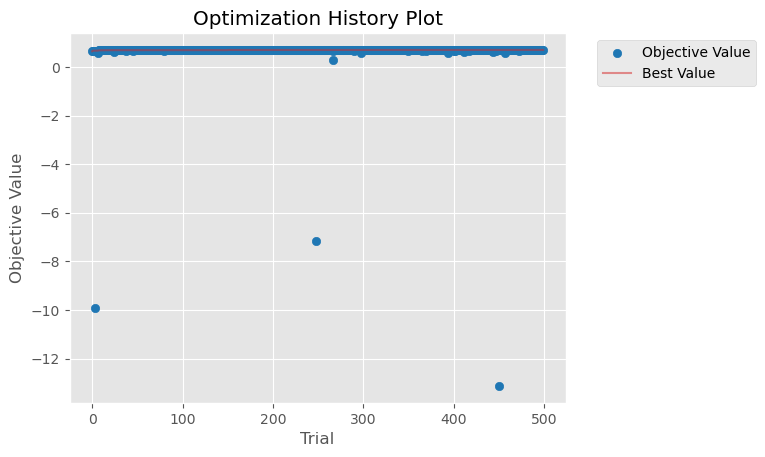

In [100]:
plot_optimization_history(study_xgb);

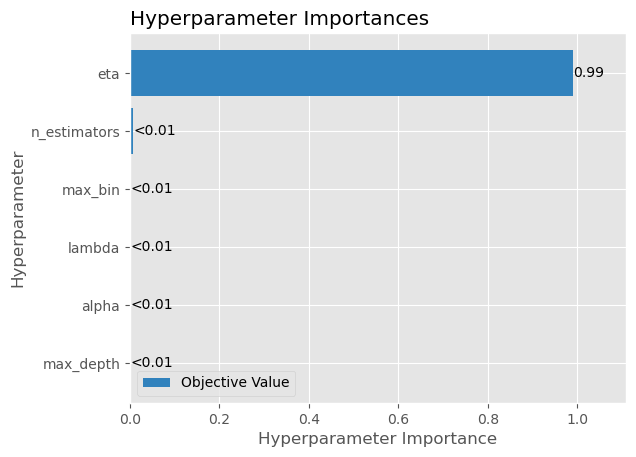

In [101]:
plot_param_importances(study_xgb);

In [102]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.708270,0.030854
1,TP,164.400000,5.601587
2,TN,89.200000,6.762642
3,FP,24.200000,5.731007
4,FN,19.300000,6.019413
5,Accuracy,0.853596,0.031440
6,Precision,0.872116,0.027538
7,Sensitivity,0.895148,0.031817
8,Specificity,0.786420,0.051263
9,F1 score,0.883208,0.024770


In [103]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.714082,0.725363,0.713134,0.688499,0.704908,0.706308,0.715518,0.695919,0.720062,0.710447,0.709424,0.011011
1,TP,328.000000,331.000000,311.000000,319.000000,339.000000,322.000000,331.000000,314.000000,324.000000,329.000000,324.800000,8.534896
2,TN,186.000000,187.000000,194.000000,183.000000,167.000000,185.000000,172.000000,179.000000,176.000000,171.000000,180.000000,8.472177
3,FP,41.000000,36.000000,59.000000,59.000000,57.000000,47.000000,56.000000,56.000000,45.000000,56.000000,51.200000,8.270429
4,FN,40.000000,41.000000,31.000000,34.000000,32.000000,41.000000,36.000000,46.000000,50.000000,39.000000,39.000000,6.018490
5,Accuracy,0.863866,0.870588,0.848739,0.843697,0.850420,0.852101,0.845378,0.828571,0.840336,0.840336,0.848403,0.012036
6,Precision,0.888889,0.901907,0.840541,0.843915,0.856061,0.872629,0.855297,0.848649,0.878049,0.854545,0.864048,0.020401
7,Sensitivity,0.891304,0.889785,0.909357,0.903683,0.913747,0.887052,0.901907,0.872222,0.866310,0.894022,0.892939,0.015221
8,Specificity,0.819400,0.838600,0.766800,0.756200,0.745500,0.797400,0.754400,0.761700,0.796400,0.753300,0.778970,0.031940
9,F1 score,0.890095,0.895805,0.873596,0.872777,0.883963,0.879781,0.877984,0.860274,0.872140,0.873838,0.878025,0.010081


In [104]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["rmse"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_optimized_xgb_cat = np.where((y_pred_optimized_xgb >= 6.6), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_xgb_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_xgb))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_xgb_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_xgb_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_xgb_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_xgb_cat))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


xgb_run0 = data_xgb[['y_test_idx0', 'y_test0', 'y_pred_xgb0']]
xgb_run0.sort_values(by='y_test_idx0', inplace=True)
xgb_run0.reset_index(inplace=True, drop=True)
xgb_run1 = data_xgb[['y_test_idx1', 'y_test1', 'y_pred_xgb1']]
xgb_run1.sort_values(by='y_test_idx1', inplace=True)
xgb_run1.reset_index(inplace=True, drop=True)
xgb_run2 = data_xgb[['y_test_idx2', 'y_test2', 'y_pred_xgb2']]
xgb_run2.sort_values(by='y_test_idx2', inplace=True)
xgb_run2.reset_index(inplace=True, drop=True)
xgb_run3 = data_xgb[['y_test_idx3', 'y_test3', 'y_pred_xgb3']]
xgb_run3.sort_values(by='y_test_idx3', inplace=True)
xgb_run3.reset_index(inplace=True, drop=True)
xgb_run4 = data_xgb[['y_test_idx4', 'y_test4', 'y_pred_xgb4']]
xgb_run4.sort_values(by='y_test_idx4', inplace=True)
xgb_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
xgb_5preds = pd.concat([chembl_id, xgb_run0, xgb_run1, xgb_run2, xgb_run3, xgb_run4], axis=1)
xgb_5preds = xgb_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_xgb0', 'y_pred_xgb1', 'y_pred_xgb2', 'y_pred_xgb3', 'y_pred_xgb4']]
xgb_5preds['y_pred_xgb_ave'] = xgb_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
xgb_5preds['y_pred_xgb_std'] = xgb_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
xgb_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_xgb0,y_pred_xgb1,y_pred_xgb2,y_pred_xgb3,y_pred_xgb4,y_pred_xgb_ave,y_pred_xgb_std
0,CHEMBL2047687,0,5.48,6.082468,6.025534,5.981858,6.136372,5.973534,5.946628,0.216174
1,CHEMBL1164212,1,5.76,4.686630,4.841517,4.711684,4.786704,4.935638,4.953696,0.369869
2,CHEMBL2337873,2,6.07,6.233112,6.027457,6.164878,6.154288,6.288994,6.156455,0.089101
3,CHEMBL4577419,3,7.90,7.604960,7.560972,7.607971,7.574067,7.627919,7.645982,0.115742
4,CHEMBL515452,4,6.22,6.680586,6.535979,6.930906,6.835907,6.753607,6.659497,0.231840
...,...,...,...,...,...,...,...,...,...,...
2966,CHEMBL3693800,2966,8.22,8.234132,8.180608,8.260927,8.164945,8.180732,8.206891,0.034079
2967,CHEMBL2431917,2967,7.46,7.242373,7.143218,7.284688,7.334032,7.127889,7.265367,0.113519
2968,CHEMBL2413298,2968,6.26,6.062501,5.891378,6.170100,5.952351,5.935059,6.045231,0.133199
2969,CHEMBL3656016,2969,8.52,8.094202,8.107736,8.025042,7.927164,7.985439,8.109930,0.193441


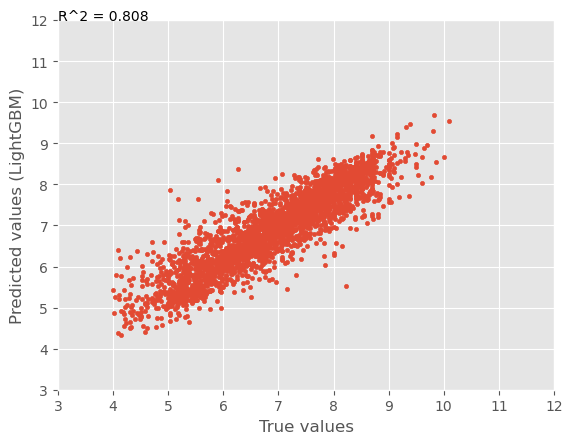

In [105]:
# Scatter plot

limits = 3,12
plt.figsize=(10,10)

plt.scatter(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'])), (3, 12))
plt.show()

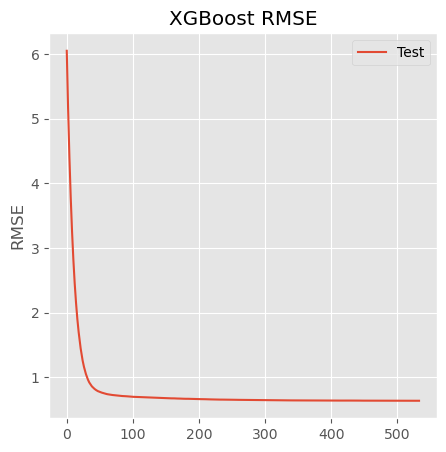

In [106]:
from matplotlib import pyplot
import matplotlib.pyplot as plt  
# retrieve performance metrics
results = optimized_xgb_0.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

 # plot classification error
#fig, ax = pyplot.subplots(figsize=(5,5))
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
    
#pyplot.ylabel('Classification Error')
#pyplot.title('XGBoost Classification Error')
#pyplot.show()

In [107]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_reg, X, Y, cv=10, scoring="r2", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
print("XGBoost baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

XGBoost baseline model r2_score 0.6635 with a standard deviation of 0.0450
XGBoost optimized model r2_score 0.7038 with a standard deviation of 0.0450


In [108]:
joblib.dump(xgb_reg, "OUTPUT/xgb_reg.joblib")
#joblib.dump(optimized_xgb, "OUTPUT/optimized_xgb.joblib")
joblib.dump(optimizedCV_xgb, "OUTPUT/optimizedCV_xgb.joblib")


['OUTPUT/optimizedCV_xgb.joblib']

## KNeighbors (KNN)

In [109]:
%%time


r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_reg = KNeighborsRegressor()
    
    knn_reg.fit(X_train,y_train)

    y_pred = knn_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.6
    y_test_cat = np.where((y_test>=6.6), 1, 0) 
    y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.647056     0.045117
1                    TP       164.800000     4.917090
2                    TN        83.400000     6.077280
3                    FP        30.000000     6.480741
4                    FN        18.900000     4.532598
5              Accuracy         0.835418     0.023106
6             Precision         0.846747     0.029393
7           Sensitivity         0.897213     0.023832
8           Specificity         0.735840     0.055371
9              F1 score         0.870839     0.017703
10  F1 score (weighted)         0.833425     0.023783
11     F1 score (macro)         0.821788     0.025695
12    Balanced Accuracy         0.816532     0.027699
13                  MCC         0.647830     0.051016
14                  NPV         0.816470     0.038970
15              ROC_AUC         0.816532     0.027699
CPU times: user 2.93 s, sys: 10.5 s, total: 13.5 s
Wall time: 665 ms


In [110]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [111]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),      
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.6
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [112]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNregressor")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:16:31,398] A new study created in memory with name: KNNregressor
[I 2023-12-12 00:16:31,761] Trial 0 finished with value: 0.5367313693190472 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 85}. Best is trial 0 with value: 0.5367313693190472.
[I 2023-12-12 00:16:31,969] Trial 1 finished with value: 0.5692816425165323 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 21}. Best is trial 1 with value: 0.5692816425165323.
[I 2023-12-12 00:16:32,476] Trial 2 finished with value: 0.5336867824216596 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 70}. Best is trial 1 with value: 0.5692816425165323.
[I 2023-12-12 00:16:32,745] Trial 3 finished with value: 0.6116212712561784 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 60}. Best is trial 3 with value: 0.6116212712561784.
[I 2023-12-12 00:16:33,069

	Number of trials: 50.0
	Best value (r2_score): 0.6241
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 63


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_knn_0)
# now convert the resuls to binary with cutoff 
y_pred_knn_0_cat = np.where((y_pred_knn_0 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_knn_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_knn_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_knn_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_knn_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_knn_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_knn_0_cat)
    

mat_met_knn_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    R2    0.643294
1                    TP  331.000000
2                    TN  175.000000
3                    FP   52.000000
4                    FN   37.000000
5              Accuracy    0.850420
6             Precision    0.864230
7           Sensitivity    0.899457
8           Specificity    0.770900
9              F1 score    0.881491
10  F1 score (weighted)    0.849359
11     F1 score (macro)    0.839379
12    Balanced Accuracy    0.835191
13                  MCC    0.679973
14                  NPV    0.825500
15              ROC_AUC    0.835191


In [114]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:16:49,393] Trial 50 finished with value: 0.5927535988037752 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 45 with value: 0.6240882702021777.
[I 2023-12-12 00:16:49,925] Trial 51 finished with value: 0.6387997871460858 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 65}. Best is trial 51 with value: 0.6387997871460858.
[I 2023-12-12 00:16:50,457] Trial 52 finished with value: 0.6387997871460858 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 64}. Best is trial 51 with value: 0.6387997871460858.
[I 2023-12-12 00:16:50,988] Trial 53 finished with value: 0.6387997871460858 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 64}. Best is trial 51 with value: 0.6387997871460858.
[I 2023-12-12 00:16:51,519] Trial 54 finished with value: 0.6372795397594865 and parameters: {'n_ne

	Number of trials: 100.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_knn_1)
# now convert the resuls to binary with cutoff 
y_pred_knn_1_cat = np.where((y_pred_knn_1 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_knn_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_knn_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_knn_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_knn_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_knn_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_knn_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    R2    0.643294    0.635706
1                    TP  331.000000  324.000000
2                    TN  175.000000  170.000000
3                    FP   52.000000   53.000000
4                    FN   37.000000   48.000000
5              Accuracy    0.850420    0.830252
6             Precision    0.864230    0.859416
7           Sensitivity    0.899457    0.870968
8           Specificity    0.770900    0.762300
9              F1 score    0.881491    0.865154
10  F1 score (weighted)    0.849359    0.829856
11     F1 score (macro)    0.839379    0.818064
12    Balanced Accuracy    0.835191    0.816650
13                  MCC    0.679973    0.636259
14                  NPV    0.825500    0.779800
15              ROC_AUC    0.835191    0.816650


In [116]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:17:15,490] Trial 100 finished with value: 0.6276991420109073 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 86}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:16,021] Trial 101 finished with value: 0.6276991420109073 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:16,552] Trial 102 finished with value: 0.6293258946280771 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:17,082] Trial 103 finished with value: 0.6256089909239044 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:17,611] Trial 104 finished with value: 0.6276991420109073 and parameters: {'

	Number of trials: 150.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_knn_2)
# now convert the resuls to binary with cutoff 
y_pred_knn_2_cat = np.where((y_pred_knn_2 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_knn_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_knn_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_knn_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_knn_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_knn_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_knn_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.643294    0.635706    0.665874
1                    TP  331.000000  324.000000  309.000000
2                    TN  175.000000  170.000000  180.000000
3                    FP   52.000000   53.000000   73.000000
4                    FN   37.000000   48.000000   33.000000
5              Accuracy    0.850420    0.830252    0.821849
6             Precision    0.864230    0.859416    0.808901
7           Sensitivity    0.899457    0.870968    0.903509
8           Specificity    0.770900    0.762300    0.711500
9              F1 score    0.881491    0.865154    0.853591
10  F1 score (weighted)    0.849359    0.829856    0.819124
11     F1 score (macro)    0.839379    0.818064    0.813062
12    Balanced Accuracy    0.835191    0.816650    0.807486
13                  MCC    0.679973    0.636259    0.634171
14                  NPV    0.825500    0.779800    0.845100
15              ROC_AUC    0.835191    0

In [118]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:17:41,510] Trial 150 finished with value: 0.641031956290048 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:42,007] Trial 151 finished with value: 0.641031956290048 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:42,474] Trial 152 finished with value: 0.641031956290048 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:42,953] Trial 153 finished with value: 0.6319137191569496 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:17:43,436] Trial 154 finished with value: 0.6374309192535278 and parameters: {'n_

	Number of trials: 200.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_knn_3)
# now convert the resuls to binary with cutoff 
y_pred_knn_3_cat = np.where((y_pred_knn_3 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_knn_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_knn_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_knn_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_knn_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_knn_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_knn_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.643294    0.635706    0.665874    0.646857
1                    TP  331.000000  324.000000  309.000000  313.000000
2                    TN  175.000000  170.000000  180.000000  176.000000
3                    FP   52.000000   53.000000   73.000000   66.000000
4                    FN   37.000000   48.000000   33.000000   40.000000
5              Accuracy    0.850420    0.830252    0.821849    0.821849
6             Precision    0.864230    0.859416    0.808901    0.825858
7           Sensitivity    0.899457    0.870968    0.903509    0.886686
8           Specificity    0.770900    0.762300    0.711500    0.727300
9              F1 score    0.881491    0.865154    0.853591    0.855191
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875
12    Balanced Accuracy    0.835191    0.816650    0.807486    0

In [120]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:18:07,238] Trial 200 finished with value: 0.6338084614466115 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:07,765] Trial 201 finished with value: 0.6338084614466115 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:08,295] Trial 202 finished with value: 0.6338084614466115 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:08,821] Trial 203 finished with value: 0.6362317919983441 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:09,344] Trial 204 finished with value: 0.6338084614466115 and parameters: {'

	Number of trials: 250.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_knn_4)
# now convert the resuls to binary with cutoff 
y_pred_knn_4_cat = np.where((y_pred_knn_4 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_knn_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_knn_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_knn_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_knn_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_knn_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_knn_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

In [122]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:18:33,046] Trial 250 finished with value: 0.6293848889144427 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:33,572] Trial 251 finished with value: 0.6256633986144724 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:34,083] Trial 252 finished with value: 0.6293848889144427 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:34,582] Trial 253 finished with value: 0.6293848889144427 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 91}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:35,096] Trial 254 finished with value: 0.6309002056068518 and parameters: {'

	Number of trials: 300.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_knn_5)
# now convert the resuls to binary with cutoff 
y_pred_knn_5_cat = np.where((y_pred_knn_5 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_knn_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_knn_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_knn_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_knn_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_knn_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_knn_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

In [124]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:18:58,903] Trial 300 finished with value: 0.6328529627968172 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:59,447] Trial 301 finished with value: 0.6347605684684735 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:18:59,964] Trial 302 finished with value: 0.6109667681052542 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:00,496] Trial 303 finished with value: 0.6328529627968172 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:01,034] Trial 304 finished with value: 0.6314603611552239 and parameters: {'

	Number of trials: 350.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [125]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_knn_6)
# now convert the resuls to binary with cutoff 
y_pred_knn_6_cat = np.where((y_pred_knn_6 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_knn_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_knn_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_knn_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_knn_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_knn_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_knn_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

In [126]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:19:25,057] Trial 350 finished with value: 0.5868629506680632 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 93}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:25,622] Trial 351 finished with value: 0.6392740057003838 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:26,152] Trial 352 finished with value: 0.6411176207984672 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:26,669] Trial 353 finished with value: 0.6344271998430969 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:27,176] Trial 354 finished with value: 0.6404007922405693 and parameters: 

	Number of trials: 400.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [127]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_knn_7)
# now convert the resuls to binary with cutoff 
y_pred_knn_7_cat = np.where((y_pred_knn_7 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_knn_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_knn_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_knn_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_knn_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_knn_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_knn_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

In [128]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:19:51,327] Trial 400 finished with value: 0.6292558267883952 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 55}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:51,862] Trial 401 finished with value: 0.6322644613993542 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 47}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:52,395] Trial 402 finished with value: 0.6292558267883952 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 48}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:52,823] Trial 403 finished with value: 0.6254713760302932 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 45}. Best is trial 85 with value: 0.6419118091617892.
[I 2023-12-12 00:19:53,368] Trial 404 finished with value: 0.6292558267883952 and parameters: {'

	Number of trials: 450.0
	Best value (r2_score): 0.6419
	Best params:
		n_neighbors: 7
		weights: distance
		metric: manhattan
		leaf_size: 100


In [129]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_knn_8)
# now convert the resuls to binary with cutoff 
y_pred_knn_8_cat = np.where((y_pred_knn_8 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_knn_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_knn_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_knn_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_knn_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_knn_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_knn_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

In [130]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:20:17,520] Trial 450 finished with value: 0.6468399769920511 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 43}. Best is trial 450 with value: 0.6468399769920511.
[I 2023-12-12 00:20:17,961] Trial 451 finished with value: 0.6487624101296955 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 41}. Best is trial 451 with value: 0.6487624101296955.
[I 2023-12-12 00:20:18,423] Trial 452 finished with value: 0.6487624101296955 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 40}. Best is trial 451 with value: 0.6487624101296955.
[I 2023-12-12 00:20:18,963] Trial 453 finished with value: 0.6487624101296955 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 39}. Best is trial 451 with value: 0.6487624101296955.
[I 2023-12-12 00:20:19,503] Trial 454 finished with value: 0.6487624101296955 and parameters

	Number of trials: 500.0
	Best value (r2_score): 0.6488
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 41


In [131]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_knn_9)
# now convert the resuls to binary with cutoff 
y_pred_knn_9_cat = np.where((y_pred_knn_9 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_knn_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_knn_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_knn_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_knn_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_knn_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_knn_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.643294    0.635706    0.665874    0.646857   
1                    TP  331.000000  324.000000  309.000000  313.000000   
2                    TN  175.000000  170.000000  180.000000  176.000000   
3                    FP   52.000000   53.000000   73.000000   66.000000   
4                    FN   37.000000   48.000000   33.000000   40.000000   
5              Accuracy    0.850420    0.830252    0.821849    0.821849   
6             Precision    0.864230    0.859416    0.808901    0.825858   
7           Sensitivity    0.899457    0.870968    0.903509    0.886686   
8           Specificity    0.770900    0.762300    0.711500    0.727300   
9              F1 score    0.881491    0.865154    0.853591    0.855191   
10  F1 score (weighted)    0.849359    0.829856    0.819124    0.819956   
11     F1 score (macro)    0.839379    0.818064    0.813062    0.811875   
12    Balanced Accuracy  

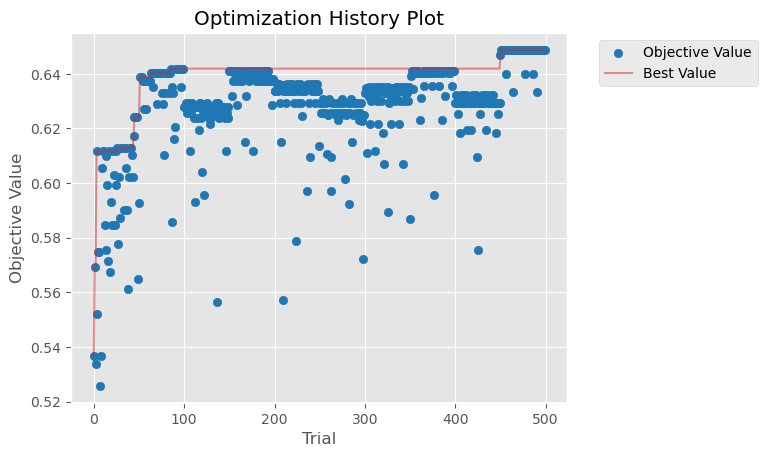

In [132]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

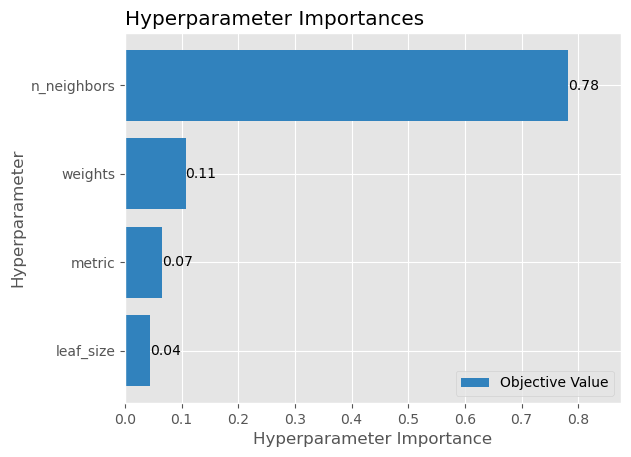

In [133]:

plot_param_importances(study_knn);

In [134]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.658818,0.043759
1,TP,166.000000,4.570436
2,TN,85.300000,6.961002
3,FP,28.100000,6.838616
4,FN,17.700000,3.713339
5,Accuracy,0.845852,0.024708
6,Precision,0.856097,0.031244
7,Sensitivity,0.903702,0.019556
8,Specificity,0.752400,0.059780
9,F1 score,0.878894,0.018315


In [135]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.643294,0.635706,0.665874,0.646857,0.661726,0.640378,0.678259,0.636796,0.669328,0.621768,0.649999,0.017903
1,TP,331.000000,324.000000,309.000000,313.000000,339.000000,326.000000,334.000000,325.000000,330.000000,331.000000,326.200000,9.199034
2,TN,175.000000,170.000000,180.000000,176.000000,158.000000,174.000000,168.000000,175.000000,166.000000,166.000000,170.800000,6.460134
3,FP,52.000000,53.000000,73.000000,66.000000,66.000000,58.000000,60.000000,60.000000,55.000000,61.000000,60.400000,6.518350
4,FN,37.000000,48.000000,33.000000,40.000000,32.000000,37.000000,33.000000,35.000000,44.000000,37.000000,37.600000,5.125102
5,Accuracy,0.850420,0.830252,0.821849,0.821849,0.835294,0.840336,0.843697,0.840336,0.833613,0.835294,0.835294,0.009068
6,Precision,0.864230,0.859416,0.808901,0.825858,0.837037,0.848958,0.847716,0.844156,0.857143,0.844388,0.843780,0.016557
7,Sensitivity,0.899457,0.870968,0.903509,0.886686,0.913747,0.898072,0.910082,0.902778,0.882353,0.899457,0.896711,0.013074
8,Specificity,0.770900,0.762300,0.711500,0.727300,0.705400,0.750000,0.736800,0.744700,0.751100,0.731300,0.739130,0.020940
9,F1 score,0.881491,0.865154,0.853591,0.855191,0.873711,0.872825,0.877792,0.872483,0.869565,0.871053,0.869286,0.009000


In [136]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_optimized_knn_cat = np.where((y_pred_optimized_knn >= 6.6), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_knn_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_knn))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_knn_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_knn_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_knn_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_knn_cat))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


knn_run0 = data_knn[['y_test_idx0', 'y_test0', 'y_pred_knn0']]
knn_run0.sort_values(by='y_test_idx0', inplace=True)
knn_run0.reset_index(inplace=True, drop=True)
knn_run1 = data_knn[['y_test_idx1', 'y_test1', 'y_pred_knn1']]
knn_run1.sort_values(by='y_test_idx1', inplace=True)
knn_run1.reset_index(inplace=True, drop=True)
knn_run2 = data_knn[['y_test_idx2', 'y_test2', 'y_pred_knn2']]
knn_run2.sort_values(by='y_test_idx2', inplace=True)
knn_run2.reset_index(inplace=True, drop=True)
knn_run3 = data_knn[['y_test_idx3', 'y_test3', 'y_pred_knn3']]
knn_run3.sort_values(by='y_test_idx3', inplace=True)
knn_run3.reset_index(inplace=True, drop=True)
knn_run4 = data_knn[['y_test_idx4', 'y_test4', 'y_pred_knn4']]
knn_run4.sort_values(by='y_test_idx4', inplace=True)
knn_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
knn_5preds = pd.concat([chembl_id, knn_run0, knn_run1, knn_run2, knn_run3, knn_run4], axis=1)
knn_5preds = knn_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_knn0', 'y_pred_knn1', 'y_pred_knn2', 'y_pred_knn3', 'y_pred_knn4']]
knn_5preds['y_pred_knn_ave'] = knn_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
knn_5preds['y_pred_knn_std'] = knn_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
knn_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_knn0,y_pred_knn1,y_pred_knn2,y_pred_knn3,y_pred_knn4,y_pred_knn_ave,y_pred_knn_std
0,CHEMBL2047687,0,5.48,5.767736,5.767736,5.848059,5.877176,5.767736,5.751407,0.128855
1,CHEMBL1164212,1,5.76,4.721115,4.721115,4.721115,4.721115,4.717495,4.893659,0.387442
2,CHEMBL2337873,2,6.07,6.185194,6.112129,6.139218,6.185194,6.261499,6.158872,0.061084
3,CHEMBL4577419,3,7.90,7.753628,7.737701,7.703214,7.703214,7.703214,7.750162,0.069799
4,CHEMBL515452,4,6.22,6.561392,6.606488,6.606488,6.606488,6.590732,6.531932,0.140418
...,...,...,...,...,...,...,...,...,...,...
2966,CHEMBL3693800,2966,8.22,8.156009,8.156009,8.352267,8.156009,8.156009,8.199384,0.072254
2967,CHEMBL2431917,2967,7.46,7.383905,7.383905,7.297824,7.346097,7.383905,7.375940,0.048732
2968,CHEMBL2413298,2968,6.26,5.967708,5.971729,5.967708,5.967708,5.967708,6.017094,0.108641
2969,CHEMBL3656016,2969,8.52,8.335466,8.335466,8.364407,8.427198,8.364407,8.391157,0.065235


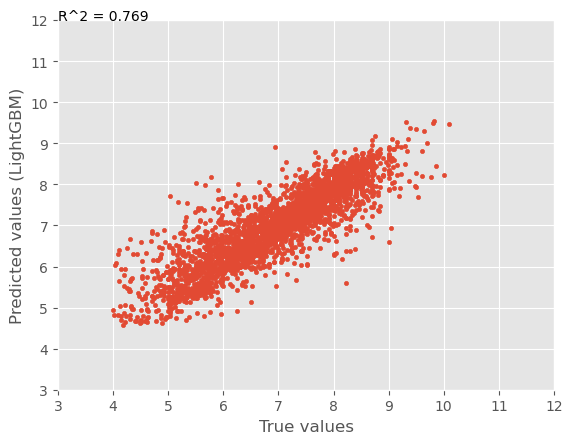

In [137]:
# Scatter plot

limits = 3,12
plt.figsize=(10,10)

plt.scatter(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'])), (3, 12))
plt.show()

In [138]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_reg, X, Y, cv=10, scoring="r2")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="r2")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="r2")
print("KNN baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model r2_score 0.6393 with a standard deviation of 0.0400
KNN optimized model r2_score 0.6499 with a standard deviation of 0.0402


In [139]:
joblib.dump(knn_reg, "OUTPUT/knn_reg.joblib")
#joblib.dump(optimized_knn, "OUTPUT/optimized_knn.joblib")
joblib.dump(optimizedCV_knn, "OUTPUT/optimizedCV_knn.joblib")
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_knn.joblib']

## Support Vector 

In [140]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_reg = SVR()
    
    svm_reg.fit(X_train, y_train, )

    y_pred = svm_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.6
    y_test_cat = np.where((y_test>=6.6), 1, 0) 
    y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.692719     0.028995
1                    TP       165.100000     5.506562
2                    TN        86.500000     6.293736
3                    FP        26.900000     4.653553
4                    FN        18.600000     5.440588
5              Accuracy         0.846865     0.025608
6             Precision         0.860226     0.020991
7           Sensitivity         0.898886     0.028983
8           Specificity         0.762410     0.042845
9              F1 score         0.878901     0.020021
10  F1 score (weighted)         0.845591     0.025700
11     F1 score (macro)         0.835083     0.028162
12    Balanced Accuracy         0.830643     0.027811
13                  MCC         0.672603     0.056613
14                  NPV         0.824060     0.047798
15              ROC_AUC         0.830643     0.027811
CPU times: user 11.4 s, sys: 0 ns, total: 11.4 s
Wall time: 11.4 s


In [141]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)


In [142]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.6
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_cat = np.where((y_pred >= 6.6), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [143]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_regressor_CV")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:21:02,103] A new study created in memory with name: SVM_regressor_CV
[I 2023-12-12 00:21:09,152] Trial 0 finished with value: 0.4468836525627882 and parameters: {'C': 0.125, 'gamma': 0.03125}. Best is trial 0 with value: 0.4468836525627882.
[I 2023-12-12 00:21:16,147] Trial 1 finished with value: 0.07729306308617256 and parameters: {'C': 0.0625, 'gamma': 0.00048828125}. Best is trial 0 with value: 0.4468836525627882.
[I 2023-12-12 00:21:22,860] Trial 2 finished with value: 0.6179559922110088 and parameters: {'C': 4.0, 'gamma': 0.001953125}. Best is trial 2 with value: 0.6179559922110088.
[I 2023-12-12 00:21:30,339] Trial 3 finished with value: 0.0210508713213186 and parameters: {'C': 0.5, 'gamma': 0.5}. Best is trial 2 with value: 0.6179559922110088.
[I 2023-12-12 00:21:37,534] Trial 4 finished with value: 0.27285814231161837 and parameters: {'C': 32.0, 'gamma': 0.125}. Best is trial 2 with value: 0.6179559922110088.
[I 2023-12-12 00:21:45,053] Trial 5 finished with va

	Number of trials: 50.0
	Best value (r2_score): 0.6866
	Best params:
		C: 4.0
		gamma: 0.015625


In [144]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_svm_0)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_0_cat = np.where((y_pred_svm_0 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_svm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_svm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_svm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_svm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_svm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_svm_0_cat)
    

mat_met_svm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    R2    0.713191
1                    TP  335.000000
2                    TN  188.000000
3                    FP   39.000000
4                    FN   33.000000
5              Accuracy    0.878992
6             Precision    0.895722
7           Sensitivity    0.910326
8           Specificity    0.828200
9              F1 score    0.902965
10  F1 score (weighted)    0.878671
11     F1 score (macro)    0.871125
12    Balanced Accuracy    0.869260
13                  MCC    0.742450
14                  NPV    0.850700
15              ROC_AUC    0.869260


In [145]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:27:14,774] Trial 50 finished with value: 0.2478747403615106 and parameters: {'C': 4.0, 'gamma': 3.0517578125e-05}. Best is trial 11 with value: 0.6866339253789416.
[I 2023-12-12 00:27:21,771] Trial 51 finished with value: 0.690101305102947 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.690101305102947.
[I 2023-12-12 00:27:28,571] Trial 52 finished with value: 0.690101305102947 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.690101305102947.
[I 2023-12-12 00:27:35,293] Trial 53 finished with value: 0.690101305102947 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.690101305102947.
[I 2023-12-12 00:27:41,782] Trial 54 finished with value: 0.5852969393291907 and parameters: {'C': 4.0, 'gamma': 0.0009765625}. Best is trial 51 with value: 0.690101305102947.
[I 2023-12-12 00:27:49,152] Trial 55 finished with value: 0.6478905918102722 and parameters: {'C': 8.0, 'gamma': 0.00390625}. Best

	Number of trials: 100.0
	Best value (r2_score): 0.6901
	Best params:
		C: 4.0
		gamma: 0.015625


In [146]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_svm_1)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_1_cat = np.where((y_pred_svm_1 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_svm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_svm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_svm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_svm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_svm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_svm_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    R2    0.713191    0.718417
1                    TP  335.000000  335.000000
2                    TN  188.000000  178.000000
3                    FP   39.000000   45.000000
4                    FN   33.000000   37.000000
5              Accuracy    0.878992    0.862185
6             Precision    0.895722    0.881579
7           Sensitivity    0.910326    0.900538
8           Specificity    0.828200    0.798200
9              F1 score    0.902965    0.890957
10  F1 score (weighted)    0.878671    0.861659
11     F1 score (macro)    0.871125    0.851871
12    Balanced Accuracy    0.869260    0.849372
13                  MCC    0.742450    0.704094
14                  NPV    0.850700    0.827900
15              ROC_AUC    0.869260    0.849372


In [147]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:32:49,532] Trial 100 finished with value: 0.62536697473798 and parameters: {'C': 16.0, 'gamma': 0.001953125}. Best is trial 51 with value: 0.690101305102947.
[I 2023-12-12 00:32:56,365] Trial 101 finished with value: 0.6908565532162256 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.6908565532162256.
[I 2023-12-12 00:33:03,116] Trial 102 finished with value: 0.6908565532162256 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.6908565532162256.
[I 2023-12-12 00:33:10,181] Trial 103 finished with value: 0.6908565532162256 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.6908565532162256.
[I 2023-12-12 00:33:17,707] Trial 104 finished with value: 0.04865562169139011 and parameters: {'C': 4.0, 'gamma': 0.5}. Best is trial 101 with value: 0.6908565532162256.
[I 2023-12-12 00:33:24,145] Trial 105 finished with value: 0.5647191669173635 and parameters: {'C': 0.25, 'gamma': 0.015625}. Bes

	Number of trials: 150.0
	Best value (r2_score): 0.6917
	Best params:
		C: 16.0
		gamma: 0.015625


In [148]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_svm_2)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_2_cat = np.where((y_pred_svm_2 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_svm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_svm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_svm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_svm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_svm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_svm_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.713191    0.718417    0.708531
1                    TP  335.000000  335.000000  310.000000
2                    TN  188.000000  178.000000  192.000000
3                    FP   39.000000   45.000000   61.000000
4                    FN   33.000000   37.000000   32.000000
5              Accuracy    0.878992    0.862185    0.843697
6             Precision    0.895722    0.881579    0.835580
7           Sensitivity    0.910326    0.900538    0.906433
8           Specificity    0.828200    0.798200    0.758900
9              F1 score    0.902965    0.890957    0.869565
10  F1 score (weighted)    0.878671    0.861659    0.842125
11     F1 score (macro)    0.871125    0.851871    0.837298
12    Balanced Accuracy    0.869260    0.849372    0.832663
13                  MCC    0.742450    0.704094    0.678886
14                  NPV    0.850700    0.827900    0.857100
15              ROC_AUC    0.869260    0

In [149]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:38:47,675] Trial 150 finished with value: 0.6052139710693882 and parameters: {'C': 16.0, 'gamma': 0.00048828125}. Best is trial 146 with value: 0.6916913268243857.
[I 2023-12-12 00:38:54,272] Trial 151 finished with value: 0.6974624975241241 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:39:00,757] Trial 152 finished with value: 0.6974624975241241 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:39:07,413] Trial 153 finished with value: 0.6974624975241241 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:39:13,877] Trial 154 finished with value: 0.6974624975241241 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:39:20,349] Trial 155 finished with value: 0.6974624975241241 and parameters: {'C': 16.0, 'gamma': 

	Number of trials: 200.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [150]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_svm_3)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_3_cat = np.where((y_pred_svm_3 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_svm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_svm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_svm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_svm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_svm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_svm_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.713191    0.718417    0.708531    0.678131
1                    TP  335.000000  335.000000  310.000000  317.000000
2                    TN  188.000000  178.000000  192.000000  181.000000
3                    FP   39.000000   45.000000   61.000000   61.000000
4                    FN   33.000000   37.000000   32.000000   36.000000
5              Accuracy    0.878992    0.862185    0.843697    0.836975
6             Precision    0.895722    0.881579    0.835580    0.838624
7           Sensitivity    0.910326    0.900538    0.906433    0.898017
8           Specificity    0.828200    0.798200    0.758900    0.747900
9              F1 score    0.902965    0.890957    0.869565    0.867305
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988
12    Balanced Accuracy    0.869260    0.849372    0.832663    0

In [151]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:44:28,816] Trial 200 finished with value: 0.6828094309763 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:44:36,077] Trial 201 finished with value: 0.6222115684220875 and parameters: {'C': 16.0, 'gamma': 0.0009765625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:44:43,457] Trial 202 finished with value: 0.6828094309763 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:44:50,465] Trial 203 finished with value: 0.6828094309763 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:44:57,604] Trial 204 finished with value: 0.6828094309763 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:45:04,822] Trial 205 finished with value: 0.6828094309763 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best 

	Number of trials: 250.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [152]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_svm_4)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_4_cat = np.where((y_pred_svm_4 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_svm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_svm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_svm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_svm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_svm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_svm_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [153]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:50:34,392] Trial 250 finished with value: 0.6863614860951411 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:50:41,235] Trial 251 finished with value: 0.6863614860951411 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:50:48,798] Trial 252 finished with value: 0.6863614860951411 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:50:55,132] Trial 253 finished with value: 0.43250620194338507 and parameters: {'C': 16.0, 'gamma': 3.0517578125e-05}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:51:02,412] Trial 254 finished with value: 0.02466573337923238 and parameters: {'C': 16.0, 'gamma': 1.0}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:51:09,099] Trial 255 finished with value: 0.6863614860951411 and parameters: {'C': 16.0, 'gamma': 

	Number of trials: 300.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [154]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_svm_5)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_5_cat = np.where((y_pred_svm_5 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_svm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_svm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_svm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_svm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_svm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_svm_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [155]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 00:56:20,530] Trial 300 finished with value: 0.6675669604737855 and parameters: {'C': 32.0, 'gamma': 0.03125}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:56:27,483] Trial 301 finished with value: 0.6836712075701689 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:56:34,657] Trial 302 finished with value: 0.6836712075701689 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:56:41,932] Trial 303 finished with value: 0.49595693839092486 and parameters: {'C': 2.0, 'gamma': 0.00048828125}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:56:48,942] Trial 304 finished with value: 0.6836712075701689 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 00:56:55,932] Trial 305 finished with value: 0.6806940353989054 and parameters: {'C': 128.0, 'gamma': 

	Number of trials: 350.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [156]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_svm_6)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_6_cat = np.where((y_pred_svm_6 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_svm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_svm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_svm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_svm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_svm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_svm_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [157]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 01:02:19,084] Trial 350 finished with value: 0.34283542600580846 and parameters: {'C': 0.125, 'gamma': 0.001953125}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:02:25,706] Trial 351 finished with value: 0.6839842879153459 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:02:32,707] Trial 352 finished with value: 0.6839842879153459 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:02:39,431] Trial 353 finished with value: 0.09180438765879817 and parameters: {'C': 0.0078125, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:02:46,259] Trial 354 finished with value: -0.0074239700421417365 and parameters: {'C': 0.03125, 'gamma': 2.0}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:02:54,154] Trial 355 finished with value: 0.03849084670775514 and parameters: {'C': 16.0, 

	Number of trials: 400.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [158]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_svm_7)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_7_cat = np.where((y_pred_svm_7 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_svm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_svm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_svm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_svm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_svm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_svm_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [159]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 01:08:08,560] Trial 400 finished with value: 0.6334940651537473 and parameters: {'C': 0.5, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:08:16,234] Trial 401 finished with value: 0.6813280026064432 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:08:23,275] Trial 402 finished with value: 0.6813280026064432 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:08:30,067] Trial 403 finished with value: 0.5081411548029009 and parameters: {'C': 16.0, 'gamma': 6.103515625e-05}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:08:36,905] Trial 404 finished with value: 0.6813280026064432 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:08:43,743] Trial 405 finished with value: 0.5830587490189424 and parameters: {'C': 16.0, 'gamma':

	Number of trials: 450.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [160]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_svm_8)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_8_cat = np.where((y_pred_svm_8 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_svm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_svm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_svm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_svm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_svm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_svm_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [161]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-12 01:14:14,910] Trial 450 finished with value: 0.5081649683734353 and parameters: {'C': 16.0, 'gamma': 6.103515625e-05}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:14:21,708] Trial 451 finished with value: 0.6940845876356374 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:14:28,502] Trial 452 finished with value: 0.6946275781074274 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:14:35,168] Trial 453 finished with value: 0.6914123725669139 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:14:41,899] Trial 454 finished with value: 0.6946275781074274 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.6974624975241241.
[I 2023-12-12 01:14:48,800] Trial 455 finished with value: 0.08308905648416517 and parameters: {'C': 16.0, 'gamm

	Number of trials: 500.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


In [162]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_svm_9)
# now convert the resuls to binary with cutoff 6.6
y_pred_svm_9_cat = np.where((y_pred_svm_9 >= 6.6), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_svm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_svm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_svm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_svm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_svm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_svm_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.713191    0.718417    0.708531    0.678131   
1                    TP  335.000000  335.000000  310.000000  317.000000   
2                    TN  188.000000  178.000000  192.000000  181.000000   
3                    FP   39.000000   45.000000   61.000000   61.000000   
4                    FN   33.000000   37.000000   32.000000   36.000000   
5              Accuracy    0.878992    0.862185    0.843697    0.836975   
6             Precision    0.895722    0.881579    0.835580    0.838624   
7           Sensitivity    0.910326    0.900538    0.906433    0.898017   
8           Specificity    0.828200    0.798200    0.758900    0.747900   
9              F1 score    0.902965    0.890957    0.869565    0.867305   
10  F1 score (weighted)    0.878671    0.861659    0.842125    0.835323   
11     F1 score (macro)    0.871125    0.851871    0.837298    0.827988   
12    Balanced Accuracy  

In [163]:
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.6975
	Best params:
		C: 16.0
		gamma: 0.015625


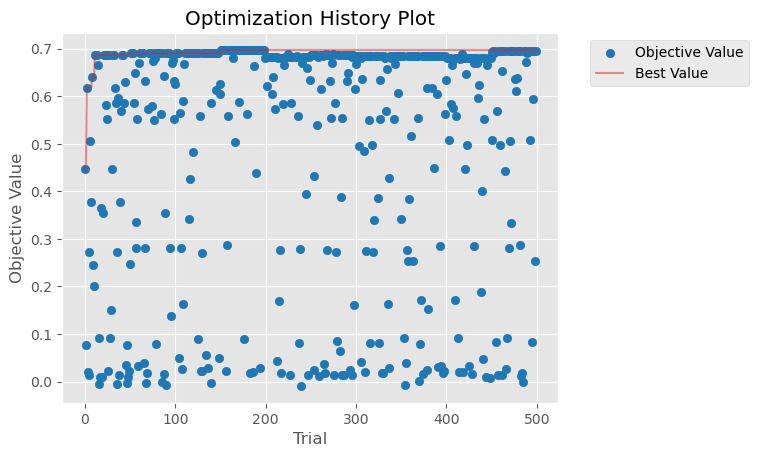

In [164]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [165]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [166]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.711331,0.028449
1,TP,165.400000,4.273952
2,TN,89.000000,5.734884
3,FP,24.400000,4.971027
4,FN,18.300000,4.423423
5,Accuracy,0.856290,0.024177
6,Precision,0.871815,0.023880
7,Sensitivity,0.900547,0.022982
8,Specificity,0.784800,0.043967
9,F1 score,0.885744,0.018649


In [167]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.713191,0.718417,0.708531,0.678131,0.716960,0.693906,0.721868,0.701108,0.714266,0.719360,0.708574,0.013791
1,TP,335.000000,335.000000,310.000000,317.000000,336.000000,323.000000,331.000000,321.000000,327.000000,326.000000,326.100000,8.556349
2,TN,188.000000,178.000000,192.000000,181.000000,170.000000,191.000000,169.000000,183.000000,176.000000,183.000000,181.100000,8.006248
3,FP,39.000000,45.000000,61.000000,61.000000,54.000000,41.000000,59.000000,52.000000,45.000000,44.000000,50.100000,8.372574
4,FN,33.000000,37.000000,32.000000,36.000000,35.000000,40.000000,36.000000,39.000000,47.000000,42.000000,37.700000,4.473378
5,Accuracy,0.878992,0.862185,0.843697,0.836975,0.850420,0.863866,0.840336,0.847059,0.845378,0.855462,0.852437,0.012844
6,Precision,0.895722,0.881579,0.835580,0.838624,0.861538,0.887363,0.848718,0.860590,0.879032,0.881081,0.866983,0.021063
7,Sensitivity,0.910326,0.900538,0.906433,0.898017,0.905660,0.889807,0.901907,0.891667,0.874332,0.885870,0.896456,0.011026
8,Specificity,0.828200,0.798200,0.758900,0.747900,0.758900,0.823300,0.741200,0.778700,0.796400,0.806200,0.783790,0.031214
9,F1 score,0.902965,0.890957,0.869565,0.867305,0.883049,0.888583,0.874505,0.875853,0.876676,0.883469,0.881293,0.010823


In [168]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where((y_test>=6.6), 1, 0) 
        y_pred_optimized_svm_cat = np.where((y_pred_optimized_svm >= 6.6), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_svm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_svm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_svm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_svm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_svm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_svm_cat))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


svm_run0 = data_svm[['y_test_idx0', 'y_test0', 'y_pred_svm0']]
svm_run0.sort_values(by='y_test_idx0', inplace=True)
svm_run0.reset_index(inplace=True, drop=True)
svm_run1 = data_svm[['y_test_idx1', 'y_test1', 'y_pred_svm1']]
svm_run1.sort_values(by='y_test_idx1', inplace=True)
svm_run1.reset_index(inplace=True, drop=True)
svm_run2 = data_svm[['y_test_idx2', 'y_test2', 'y_pred_svm2']]
svm_run2.sort_values(by='y_test_idx2', inplace=True)
svm_run2.reset_index(inplace=True, drop=True)
svm_run3 = data_svm[['y_test_idx3', 'y_test3', 'y_pred_svm3']]
svm_run3.sort_values(by='y_test_idx3', inplace=True)
svm_run3.reset_index(inplace=True, drop=True)
svm_run4 = data_svm[['y_test_idx4', 'y_test4', 'y_pred_svm4']]
svm_run4.sort_values(by='y_test_idx4', inplace=True)
svm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
svm_5preds = pd.concat([chembl_id, svm_run0, svm_run1, svm_run2, svm_run3, svm_run4], axis=1)
svm_5preds = svm_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_svm0', 'y_pred_svm1', 'y_pred_svm2', 'y_pred_svm3', 'y_pred_svm4']]
svm_5preds['y_pred_svm_ave'] = svm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
svm_5preds['y_pred_svm_std'] = svm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
svm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_svm0,y_pred_svm1,y_pred_svm2,y_pred_svm3,y_pred_svm4,y_pred_svm_ave,y_pred_svm_std
0,CHEMBL2047687,0,5.48,5.791406,5.790756,5.809844,5.774863,5.802858,5.741621,0.117507
1,CHEMBL1164212,1,5.76,5.235682,5.284850,5.180544,5.094217,5.203748,5.293173,0.216629
2,CHEMBL2337873,2,6.07,6.213333,6.060871,6.135316,6.129850,6.237609,6.141163,0.066060
3,CHEMBL4577419,3,7.90,7.728884,7.665766,7.681916,7.670734,7.659775,7.717846,0.084555
4,CHEMBL515452,4,6.22,6.594512,6.708106,6.724834,6.720258,6.655570,6.603880,0.177558
...,...,...,...,...,...,...,...,...,...,...
2966,CHEMBL3693800,2966,8.22,8.165879,8.209120,8.197620,8.180154,8.203111,8.195981,0.018072
2967,CHEMBL2431917,2967,7.46,6.906326,6.963545,6.954576,6.728151,6.881785,6.982397,0.227224
2968,CHEMBL2413298,2968,6.26,6.015856,6.015853,6.075710,6.031398,6.076037,6.079142,0.084677
2969,CHEMBL3656016,2969,8.52,8.045797,8.139489,7.961229,8.058423,8.084253,8.134865,0.180203


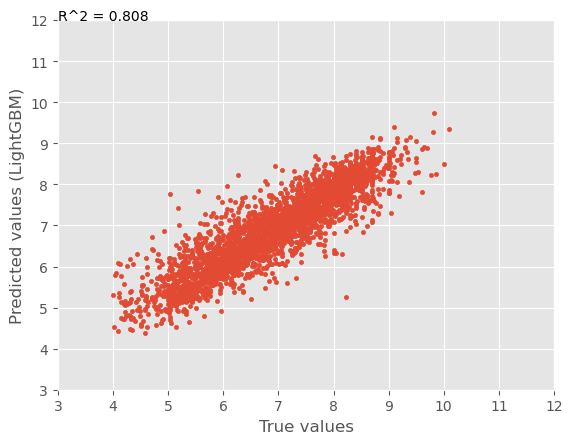

In [169]:
# Scatter plot

limits = 3,12
plt.figsize=(10,10)

plt.scatter(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'])), (3, 12))
plt.show()

In [170]:
#cross valide using this optimized SVR 
svm_baseline_CVscore = cross_val_score(svm_reg, X, Y, cv=10, scoring="r2")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="r2")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="r2")
print("SVM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model r2_score 0.6852 with a standard deviation of 0.0405
SVM optimized model r2_score 0.7052 with a standard deviation of 0.0358


In [171]:
joblib.dump(svm_reg, "OUTPUT/svm_reg.joblib")
#joblib.dump(optimized_svm, "OUTPUT/optimized_svm.joblib")
joblib.dump(optimizedCV_svm, "OUTPUT/optimizedCV_svm.joblib")

['OUTPUT/optimizedCV_svm.joblib']

In [172]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/TestSet_EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_rf_test.to_excel(writer, sheet_name="RF", )
    mat_met_lgbm_test.to_excel(writer, sheet_name="LGBM", )
    mat_met_xgb_test.to_excel(writer, sheet_name="XGB", )
    mat_met_knn_test.to_excel(writer, sheet_name="KNN", )
    mat_met_svm_test.to_excel(writer, sheet_name="SVM", )
   

In [173]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_optimized_rf.to_excel(writer, sheet_name="RF", )
    mat_met_optimized_lgbm.to_excel(writer, sheet_name="LGBM", )
    mat_met_optimized_xgb.to_excel(writer, sheet_name="XGB", )
    mat_met_optimized_knn.to_excel(writer, sheet_name="KNN", )
    mat_met_optimized_svm.to_excel(writer, sheet_name="SVM", )

In [174]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/PredResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    rf_5preds.to_excel(writer, sheet_name="RF", )
    lgbm_5preds.to_excel(writer, sheet_name="LGBM", )
    xgb_5preds.to_excel(writer, sheet_name="XGB", )
    knn_5preds.to_excel(writer, sheet_name="KNN", )
    svm_5preds.to_excel(writer, sheet_name="SVM", )